# 1-data-exploration

## Objective
Understand the dataset structure, identify data quality issues, and discover initial patterns related to customer churn.

## Key Questions
- What is the dataset size and structure?
- Are there missing values or data quality issues?
- What is the churn rate distribution?
- Which features show correlation with churn?

In [1]:
# libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
df['TotalCharges'].dtype

dtype('O')

In [10]:
#Converting total charges into float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

In [11]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [12]:
 print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head(10))

      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN


In [13]:
#Replace monthlycharges by totalcharges since it supposed to be the first payment
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'])
print(df[df['customerID'].isin(['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ'])][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

     customerID  tenure  MonthlyCharges  TotalCharges
488  4472-LVYGI       0           52.55         52.55
753  3115-CZMZD       0           20.25         20.25
936  5709-LVOEQ       0           80.85         80.85


In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [16]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [17]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [18]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [19]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Churn rate by MultipleLines:
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


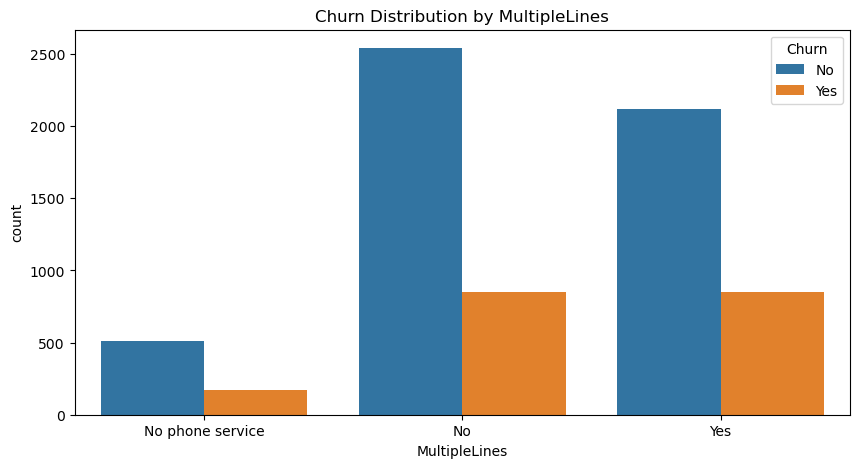

<Figure size 640x480 with 0 Axes>

In [20]:
#Relation between MultipleLines et Churn
print("Churn rate by MultipleLines:")
print(df.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack())

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.title('Churn Distribution by MultipleLines')
plt.xticks(rotation=0)
plt.show()
plt.savefig('Churn Distribution by MultipleLines.png', dpi=300, bbox_inches='tight')

We focus on 5 key hypotheses based on business impact and likelihood of significance.

- **Hypothesis:** Customers with month-to-month contracts have significantly higher churn rates than those with long-term contracts.
- **Hypothesis:** New customers (0-12 months tenure) have higher churn rates than established customers.
- **Hypothesis:** Customers with higher monthly charges are more likely to churn.
- **Hypothesis:** Customers with Fiber Optic internet have higher churn rates than DSL customers.
- **Hypothesis:** Customers without Tech Support have higher churn rates.

Churn rate by Contracts:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


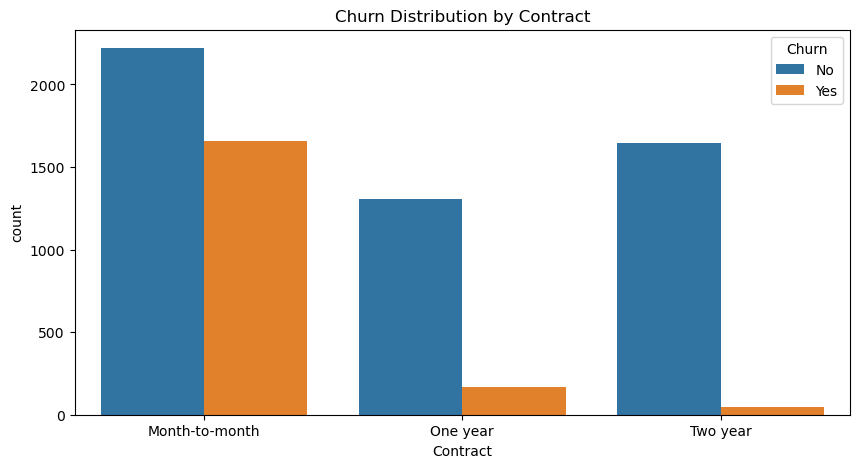

<Figure size 640x480 with 0 Axes>

In [21]:
#H1 : Customers with month-to-month contracts have significantly higher churn rates than those with long-term contracts.

#Relation between Contracts et Churn
print("Churn rate by Contracts:")
print(df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack())

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn Distribution by Contract')
plt.xticks(rotation=0)
plt.show()
plt.savefig('Churn Distribution by Contract.png', dpi=300, bbox_inches='tight')

**Result:** 
- New customers (0-12 months): ~50% churn
- Established customers (49-72 months): very low churn
- Median tenure: Churn=Yes (10 months) vs Churn=No (38 months)

**Conclusion:**  Hypothesis VALIDATED

The first year is critical. New customers are extremely vulnerable to churn.


In [22]:
# H2 : New customers (0-12 months tenure) have higher churn rates than established customers.

df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 48, 72], 
                             labels=['0-12 months', '13-24 months', '25-48 months', '49-72 months'])
df['tenure_group'].value_counts()

tenure_group
49-72 months    2239
0-12 months     2175
25-48 months    1594
13-24 months    1024
Name: count, dtype: int64

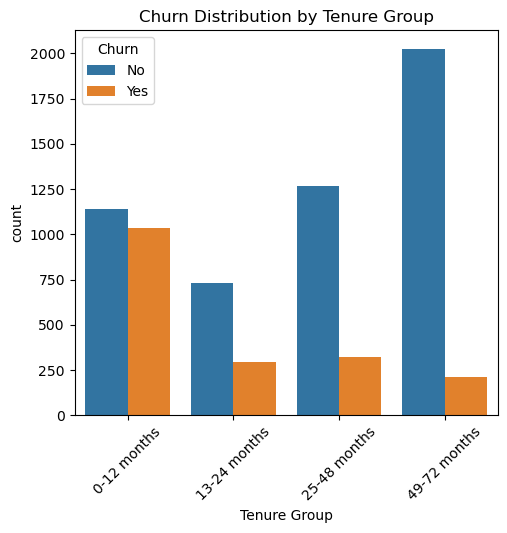

In [23]:
plt.figure(figsize=(12, 5))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='tenure_group', hue='Churn')
plt.title('Churn Distribution by Tenure Group')
plt.xlabel('Tenure Group')
plt.xticks(rotation=45)
plt.savefig('Churn Distribution by Tenure Group.png', dpi=300, bbox_inches='tight')

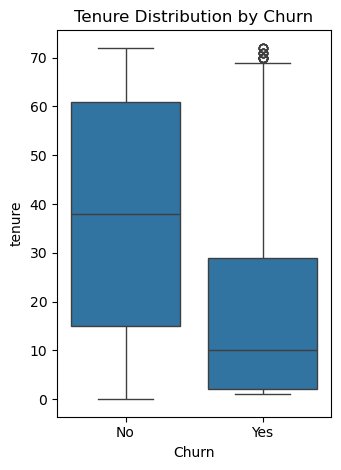

<Figure size 640x480 with 0 Axes>

In [24]:
# boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn')

plt.tight_layout()
plt.show()
plt.savefig('Tenure Distribution by Churn.png', dpi=300, bbox_inches='tight')

In [25]:
print(df.groupby('Churn')['tenure'].describe())

        count       mean        std  min   25%   50%   75%   max
Churn                                                           
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


**Result:** 
- New customers (0-12 months): ~50% churn
- Established customers (49-72 months): very low churn
- Median tenure: Churn=Yes (10 months) vs Churn=No (38 months)

**Conclusion:** Hypothesis VALIDATED

The first year is critical. New customers are extremely vulnerable to churn.

In [26]:
# H3 : Relation between MonthlyCharges and Churn

print(df.groupby('Churn')['MonthlyCharges'].describe())

        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
No     5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
Yes    1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35


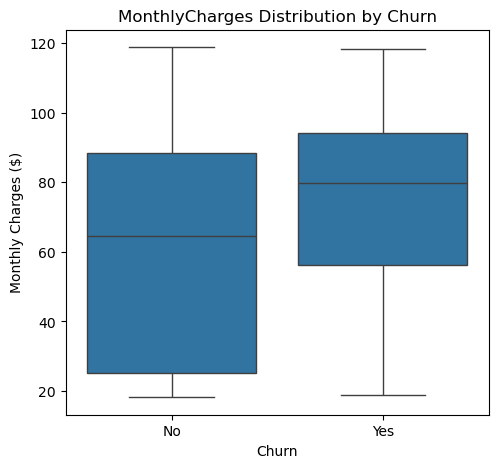

In [27]:
# Visualisation
plt.figure(figsize=(12, 5))

# Graphique 1 : Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('MonthlyCharges Distribution by Churn')
plt.ylabel('Monthly Charges ($)')
plt.savefig('MonthlyCharges Distribution by Churn.png', dpi=300, bbox_inches='tight')

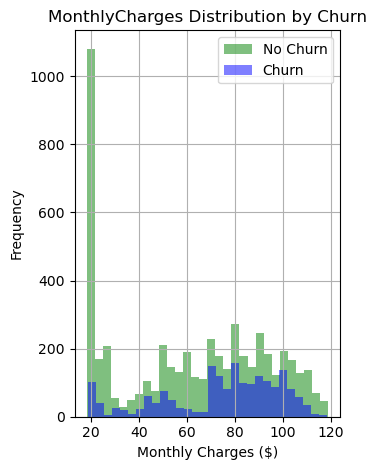

<Figure size 640x480 with 0 Axes>

In [28]:
plt.subplot(1, 2, 2)
df[df['Churn'] == 'No']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='No Churn', color='green')
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(bins=30, alpha=0.5, label='Churn', color='blue')
plt.title('MonthlyCharges Distribution by Churn')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('MonthlyCharges Distribution by Churn(2).png', dpi=300, bbox_inches='tight')

In [29]:
df['charges_group'] = pd.cut(df['MonthlyCharges'], 
                              bins=[0, 35, 70, 120], 
                              labels=['Low (0-35)', 'Medium (35-70)', 'High (70+)']
                            )
df['charges_group'].value_counts()

charges_group
High (70+)        3583
Low (0-35)        1735
Medium (35-70)    1725
Name: count, dtype: int64

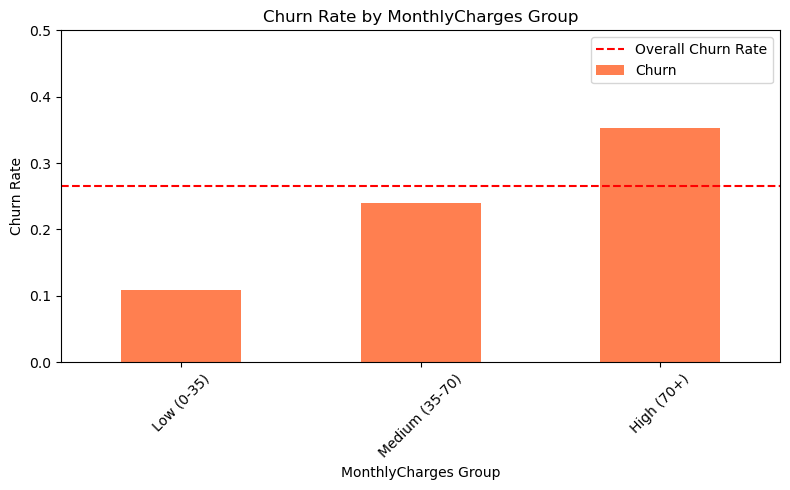

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(8, 5))
churn_by_charges = df.groupby('charges_group',observed=False)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x))
churn_by_charges.plot(kind='bar', color='coral')
plt.title('Churn Rate by MonthlyCharges Group')
plt.ylabel('Churn Rate')
plt.xlabel('MonthlyCharges Group')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.axhline(y=df['Churn'].value_counts(normalize=True)['Yes'], color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()
plt.tight_layout()
plt.show()
plt.savefig('Churn Rate by MonthlyCharges Group.png', dpi=300, bbox_inches='tight')

**Result:**
- Low charges (0-35 dollars): 11% churn
- Medium charges (35-70 dollars ): 24% churn
- High charges (70+ dollars): 36% churn
- Average: Churn=Yes (74.44) vs Churn=No (61.27)

**Conclusion:**  Hypothesis VALIDATED

Customers paying higher monthly fees are 3x more likely to churn than low-paying customers.


In [31]:
# H4: Customers with Fiber Optic internet have higher churn rates than DSL customers.

print(df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack())

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


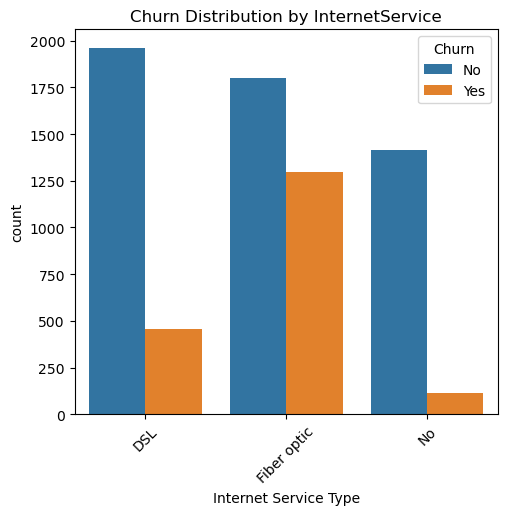

In [32]:
# Visualisation
plt.figure(figsize=(12, 5))

# Graphique 1 : Countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Distribution by InternetService')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=45)
plt.savefig('Churn Distribution by InternetService.png', dpi=300, bbox_inches='tight')

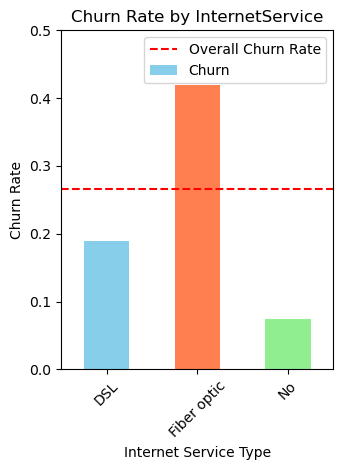

<Figure size 640x480 with 0 Axes>

In [33]:
plt.subplot(1, 2, 2)
churn_by_internet = df.groupby('InternetService', observed=False)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x))
churn_by_internet.plot(kind='bar', color=['skyblue', 'coral', 'lightgreen'])
plt.title('Churn Rate by InternetService')
plt.ylabel('Churn Rate')
plt.xlabel('Internet Service Type')
plt.xticks(rotation=45)
plt.ylim(0, 0.5)
plt.axhline(y=df['Churn'].value_counts(normalize=True)['Yes'], color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Churn Distribution by InternetService(2).png', dpi=300, bbox_inches='tight')

In [34]:
fiber_dsl = df[df['InternetService'].isin(['Fiber optic', 'DSL'])]
print(fiber_dsl.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack())

Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928


**Result:**
- Fiber optic: 41.9% churn
- DSL: 19.0% churn
- No internet: 7.4% churn

**Conclusion:** Hypothesis VALIDATED

Fiber optic customers have 2.2x higher churn than DSL customers.

Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


([0, 1, 2],
 [Text(0, 0, 'No'), Text(1, 0, 'Yes'), Text(2, 0, 'No internet service')])

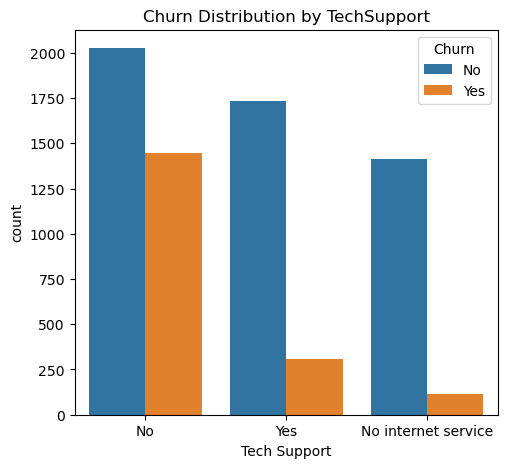

In [35]:
#H5: Customers without Tech Support have higher churn rates.
print(df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack())

# Visualisation
plt.figure(figsize=(12, 5))

#Countplot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn Distribution by TechSupport')
plt.xlabel('Tech Support')
plt.xticks(rotation=0)

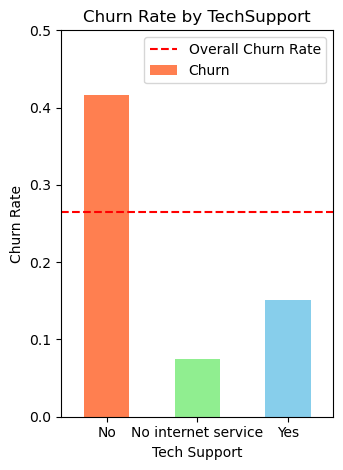

In [36]:
plt.subplot(1, 2, 2)
churn_by_tech = df.groupby('TechSupport', observed=False)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x))
churn_by_tech.plot(kind='bar', color=['coral', 'lightgreen', 'skyblue'])
plt.title('Churn Rate by TechSupport')
plt.ylabel('Churn Rate')
plt.xlabel('Tech Support')
plt.xticks(rotation=0)
plt.ylim(0, 0.5)
plt.axhline(y=df['Churn'].value_counts(normalize=True)['Yes'], color='red', linestyle='--', label='Overall Churn Rate')
plt.legend()

plt.tight_layout()
plt.show()


In [37]:
tech_yes_no = df[df['TechSupport'].isin(['Yes', 'No'])]
print(tech_yes_no.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack())

Churn              No       Yes
TechSupport                    
No           0.583645  0.416355
Yes          0.848337  0.151663


**Result:**
- No Tech Support: 41.6% churn
- Yes Tech Support: 15.2% churn
- Difference: 26.4 percentage points

**Conclusion:** Hypothesis VALIDATED

Tech Support reduces churn by nearly 3x.

**Business Insight:** Tech Support is one of the most powerful retention tools. Consider making it default or offering free trials to at-risk customers.

## Statistical Significance Testing

### Objective
Validate that observed differences in churn rates between customer segments are **statistically significant** and **not due to random chance**.

### Method
**Z-test for proportions** with:
- **Null hypothesis (H₀)**: No difference in churn rates between groups
- **Alternative hypothesis (H₁)**: A significant difference exists
- **Significance level**: α = 0.05 (95% confidence)

### Interpretation
- **p-value < 0.05**: Reject H₀ → Difference is statistically significant 
- **p-value ≥ 0.05**: Cannot reject H₀ → No evidence of difference 

In [38]:

# STATISTICAL SIGNIFICANCE TESTING

#Objective: Test if observed differences in churn rates between groups are statistically significant or could occur by chance.

#Method: Z-test for proportions
#Significance level: α = 0.05 (95% confidence)

from scipy import stats
import numpy as np

def z_test_proportions(group1_success, group1_total, group2_success, group2_total):
    
    # Proportions
    p1 = group1_success / group1_total
    p2 = group2_success / group2_total
    
    # Pooled proportion
    p_pool = (group1_success + group2_success) / (group1_total + group2_total)
    
    # Standard error
    se = np.sqrt(p_pool * (1 - p_pool) * (1/group1_total + 1/group2_total))
    
    # Z-statistic
    z = (p1 - p2) / se
    
    # P-value (two-tailed)
    p_value = 2 * (1 - stats.norm.cdf(abs(z)))
    
    return z, p_value, p1, p2

In [39]:
# TEST 1: CONTRACT TYPE
# Count churners by contract type
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

mtm_churners = contract_churn.loc['Month-to-month', 'Yes']
mtm_total = contract_churn.loc['Month-to-month'].sum()
two_year_churners = contract_churn.loc['Two year', 'Yes']
two_year_total = contract_churn.loc['Two year'].sum()

z, p_value, p_mtm, p_two_year = z_test_proportions(
    mtm_churners, mtm_total, 
    two_year_churners, two_year_total
)

print(f"\nMonth-to-Month:")
print(f"  Churn rate: {p_mtm:.1%} ({mtm_churners}/{mtm_total})")

print(f"\nTwo-Year Contract:")
print(f"  Churn rate: {p_two_year:.1%} ({two_year_churners}/{two_year_total})")

print(f"\nZ-statistic: {z:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n STATISTICALLY SIGNIFICANT (p < 0.05)")
    print(f"   Difference in churn rates: {(p_mtm - p_two_year)*100:.1f} percentage points")
    print(f"   Conclusion: Month-to-month customers churn significantly more")
else:
    print(f"\n NOT statistically significant (p >= 0.05)")



Month-to-Month:
  Churn rate: 42.7% (1655/3875)

Two-Year Contract:
  Churn rate: 2.8% (48/1695)

Z-statistic: 29.7225
P-value: 0.000000

 STATISTICALLY SIGNIFICANT (p < 0.05)
   Difference in churn rates: 39.9 percentage points
   Conclusion: Month-to-month customers churn significantly more


In [40]:
# TEST 2: TENURE

# Create tenure groups
df['tenure_group'] = df['tenure'].apply(lambda x: 'Short (<12)' if x < 12 else 'Long (>=12)')

tenure_churn = df.groupby(['tenure_group', 'Churn']).size().unstack(fill_value=0)

short_churners = tenure_churn.loc['Short (<12)', 'Yes']
short_total = tenure_churn.loc['Short (<12)'].sum()
long_churners = tenure_churn.loc['Long (>=12)', 'Yes']
long_total = tenure_churn.loc['Long (>=12)'].sum()

z, p_value, p_short, p_long = z_test_proportions(
    short_churners, short_total,
    long_churners, long_total
)

print(f"\nShort Tenure (<12 months):")
print(f"  Churn rate: {p_short:.1%} ({short_churners}/{short_total})")

print(f"\nLong Tenure (>=12 months):")
print(f"  Churn rate: {p_long:.1%} ({long_churners}/{long_total})")

print(f"\nZ-statistic: {z:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\nSTATISTICALLY SIGNIFICANT (p < 0.05)")
    print(f"   Difference in churn rates: {(p_short - p_long)*100:.1f} percentage points")
    print(f"   Conclusion: Short tenure customers churn significantly more")
else:
    print(f"\nNOT statistically significant (p >= 0.05)")


Short Tenure (<12 months):
  Churn rate: 48.3% (999/2069)

Long Tenure (>=12 months):
  Churn rate: 17.5% (870/4974)

Z-statistic: 26.6593
P-value: 0.000000

STATISTICALLY SIGNIFICANT (p < 0.05)
   Difference in churn rates: 30.8 percentage points
   Conclusion: Short tenure customers churn significantly more


In [41]:
# TEST 4: PAYMENT METHOD

payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

echeck_churners = payment_churn.loc['Electronic check', 'Yes']
echeck_total = payment_churn.loc['Electronic check'].sum()

# Combine automatic payments
auto_payments = ['Credit card (automatic)', 'Bank transfer (automatic)']
auto_churners = payment_churn.loc[auto_payments, 'Yes'].sum()
auto_total = payment_churn.loc[auto_payments].sum().sum()

z, p_value, p_echeck, p_auto = z_test_proportions(
    echeck_churners, echeck_total,
    auto_churners, auto_total
)

print(f"\nElectronic Check:")
print(f"  Churn rate: {p_echeck:.1%} ({echeck_churners}/{echeck_total})")

print(f"\nAutomatic Payment:")
print(f"  Churn rate: {p_auto:.1%} ({auto_churners}/{auto_total})")

print(f"\nZ-statistic: {z:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\nSTATISTICALLY SIGNIFICANT (p < 0.05)")
    print(f"   Difference in churn rates: {(p_echeck - p_auto)*100:.1f} percentage points")
    print(f"   Conclusion: Electronic check users churn significantly more")
else:
    print(f"\nNOT statistically significant (p >= 0.05)")


Electronic Check:
  Churn rate: 45.3% (1071/2365)

Automatic Payment:
  Churn rate: 16.0% (490/3066)

Z-statistic: 23.6596
P-value: 0.000000

STATISTICALLY SIGNIFICANT (p < 0.05)
   Difference in churn rates: 29.3 percentage points
   Conclusion: Electronic check users churn significantly more


In [42]:
# TEST 3: INTERNET SERVICE

# Filter only customers with internet
df_internet = df[df['InternetService'] != 'No']

internet_churn = df_internet.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

fiber_churners = internet_churn.loc['Fiber optic', 'Yes']
fiber_total = internet_churn.loc['Fiber optic'].sum()
dsl_churners = internet_churn.loc['DSL', 'Yes']
dsl_total = internet_churn.loc['DSL'].sum()

z, p_value, p_fiber, p_dsl = z_test_proportions(
    fiber_churners, fiber_total,
    dsl_churners, dsl_total
)

print(f"\nFiber Optic:")
print(f"  Churn rate: {p_fiber:.1%} ({fiber_churners}/{fiber_total})")

print(f"\nDSL:")
print(f"  Churn rate: {p_dsl:.1%} ({dsl_churners}/{dsl_total})")

print(f"\nZ-statistic: {z:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"\n STATISTICALLY SIGNIFICANT (p < 0.05)")
    print(f"   Difference in churn rates: {(p_fiber - p_dsl)*100:.1f} percentage points")
    print(f"   Conclusion: Fiber optic customers churn significantly more than DSL")
else:
    print(f"\n NOT statistically significant (p >= 0.05)")



Fiber Optic:
  Churn rate: 41.9% (1297/3096)

DSL:
  Churn rate: 19.0% (459/2421)

Z-statistic: 18.1472
P-value: 0.000000

 STATISTICALLY SIGNIFICANT (p < 0.05)
   Difference in churn rates: 22.9 percentage points
   Conclusion: Fiber optic customers churn significantly more than DSL


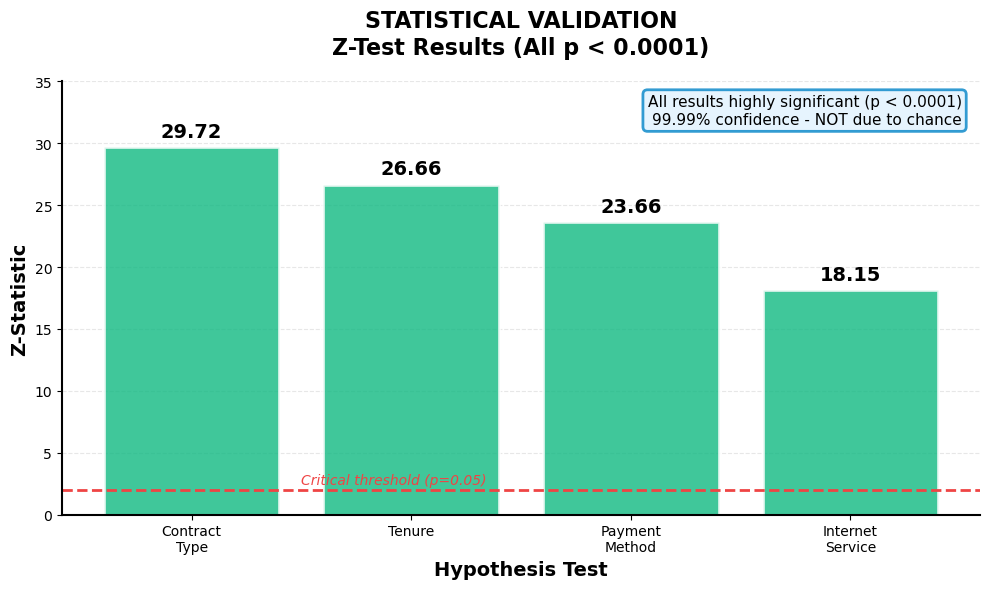

In [140]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your notebook
hypotheses = ['Contract\nType', 'Tenure', 'Payment\nMethod', 'Internet\nService']
z_statistics = [29.72, 26.66, 23.66, 18.15]
colors = ['#10b981', '#10b981', '#10b981', '#10b981']  # Green color

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
bars = ax.bar(hypotheses, z_statistics, color=colors, alpha=0.8, edgecolor='white', linewidth=2)

# Add value labels on top of bars
for i, (bar, z_val) in enumerate(zip(bars, z_statistics)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{z_val}',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add critical value line
ax.axhline(y=1.96, color='#ef4444', linestyle='--', linewidth=2, label='Critical Value (1.96)')
ax.text(0.5, 2.5, 'Critical threshold (p=0.05)', 
        fontsize=10, color='#ef4444', style='italic')

# Styling
ax.set_ylabel('Z-Statistic', fontsize=14, fontweight='bold')
ax.set_xlabel('Hypothesis Test', fontsize=14, fontweight='bold')
ax.set_title('STATISTICAL VALIDATION\nZ-Test Results (All p < 0.0001)', 
             fontsize=16, fontweight='bold', pad=20)

# Add grid
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Set y-axis limits
ax.set_ylim(0, 35)

# Add text box with conclusion
textstr = 'All results highly significant (p < 0.0001)\n99.99% confidence - NOT due to chance'
props = dict(boxstyle='round', facecolor='#e0f2fe', alpha=0.8, edgecolor='#0284c7', linewidth=2)
ax.text(0.98, 0.97, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Data from your Z-tests
data = {
    'Hypothesis': [
        'Month-to-month vs 2-year',
        'Short tenure vs Long',
        'E-check vs Auto payment',
        'Fiber optic vs DSL'
    ],
    'Z-statistic': [29.72, 26.66, 23.66, 18.15],
    'P-value': ['<0.0001', '<0.0001', '<0.0001', '<0.0001'],
    'Churn_Rate_Diff': ['39.9%', '30.8%', '29.3%', '22.9%'],
    'Confidence': ['99.99%', '99.99%', '99.99%', '99.99%']
}

# Create figure
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#8b8b7a')

# Title
ax.text(0.5, 0.95, 'HYPOTHESIS TESTING RESULTS', 
        ha='center', va='top', fontsize=32, fontweight='bold', 
        color='white', transform=ax.transAxes)

ax.text(0.5, 0.90, 'Z-Test for Proportions | Significance Level: α = 0.05', 
        ha='center', va='top', fontsize=14, 
        color='white', transform=ax.transAxes, style='italic')

# Create white box for results
box = mpatches.FancyBboxPatch((0.08, 0.15), 0.58, 0.65, 
                             boxstyle="round,pad=0.02", 
                             facecolor='white', edgecolor='none',
                             transform=ax.transAxes)
ax.add_patch(box)

# Header
header_y = 0.75
ax.text(0.12, header_y, 'Hypothesis Test', 
        fontsize=11, fontweight='bold', transform=ax.transAxes)
ax.text(0.38, header_y, 'Z-stat', 
        fontsize=11, fontweight='bold', transform=ax.transAxes)
ax.text(0.48, header_y, 'P>|z|', 
        fontsize=11, fontweight='bold', transform=ax.transAxes)
ax.text(0.57, header_y, 'Churn Diff', 
        fontsize=11, fontweight='bold', transform=ax.transAxes)

# Separator line
ax.plot([0.10, 0.64], [header_y-0.02, header_y-0.02], 
        'k-', linewidth=1, transform=ax.transAxes)

# Data rows
y_positions = [0.68, 0.58, 0.48, 0.38]
for i, y_pos in enumerate(y_positions):
    # Hypothesis name
    ax.text(0.12, y_pos, data['Hypothesis'][i], 
            fontsize=10, transform=ax.transAxes)
    
    # Z-statistic
    ax.text(0.38, y_pos, f"{data['Z-statistic'][i]:.2f}", 
            fontsize=10, transform=ax.transAxes)
    
    # P-value (highlighted in red box)
    p_box = mpatches.FancyBboxPatch((0.465, y_pos-0.015), 0.05, 0.025,
                                     boxstyle="round,pad=0.003",
                                     facecolor='none', edgecolor='red', 
                                     linewidth=2, transform=ax.transAxes)
    ax.add_patch(p_box)
    ax.text(0.49, y_pos, data['P-value'][i], 
            fontsize=10, color='red', fontweight='bold',
            transform=ax.transAxes, ha='center')
    
    # Churn rate difference
    ax.text(0.57, y_pos, data['Churn_Rate_Diff'][i], 
            fontsize=10, transform=ax.transAxes)

# Bottom separator
ax.plot([0.10, 0.64], [0.32, 0.32], 
        'k-', linewidth=1, transform=ax.transAxes)

# Summary statistics box
summary_y = 0.26
ax.text(0.12, summary_y, 'Test Summary:', 
        fontsize=11, fontweight='bold', transform=ax.transAxes)
ax.text(0.12, summary_y-0.04, 'Method:', 
        fontsize=9, transform=ax.transAxes)
ax.text(0.25, summary_y-0.04, 'Two-tailed Z-test', 
        fontsize=9, transform=ax.transAxes)
ax.text(0.12, summary_y-0.07, 'Significance:', 
        fontsize=9, transform=ax.transAxes)
ax.text(0.25, summary_y-0.07, 'α = 0.05 (95% confidence)', 
        fontsize=9, transform=ax.transAxes)
ax.text(0.12, summary_y-0.10, 'Sample size:', 
        fontsize=9, transform=ax.transAxes)
ax.text(0.25, summary_y-0.10, 'N = 7,043 customers', 
        fontsize=9, transform=ax.transAxes)

# Right side box with interpretation
interp_box = mpatches.FancyBboxPatch((0.68, 0.30), 0.28, 0.50,
                                      boxstyle="round,pad=0.02",
                                      facecolor='#f5f5dc', edgecolor='none',
                                      transform=ax.transAxes)
ax.add_patch(interp_box)

# Interpretation title
ax.text(0.82, 0.76, 'INTERPRETATION', 
        ha='center', fontsize=13, fontweight='bold',
        transform=ax.transAxes)

ax.text(0.82, 0.70, 'P>|z| VALU
# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('statistical_validation.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

All tests use Z-test for proportions with α = 0.05 significance level.

Result: All p-values < 0.05 → We reject H₀ for all hypotheses

This confirms that observed differences in churn rates are:
✓ Statistically significant
✓ NOT due to random chance
✓ Valid for business decision-making (95% confidence)

These findings validate our feature importance analysis and support
targeted retention strategies for high-risk customer segments.

### BIVARIATE ANALYSIS
We'll explore interactions between variables to find the most dangerous combinations.
Strategy:
We'll cross the most impactful variables we identified:

- Contract × InternetService (Month-to-month + Fiber = ?)
- Contract × TechSupport (Month-to-month + No TechSupport = ?)
- InternetService × TechSupport (Fiber + No TechSupport = ?)
- Tenure_group × Contract (New customers + Month-to-month = ?)

In [43]:
# Bivariate Analysis 1: Contract × InternetService

# Create crosstab with churn rates
contract_internet_churn = pd.crosstab(
    index=df['Contract'], 
    columns=df['InternetService'], 
    values=df['Churn'], 
    aggfunc=lambda x: (x == 'Yes').sum() / len(x),
    normalize=False
)

print("Churn Rate by Contract × InternetService:")
print(contract_internet_churn.round(3))

Churn Rate by Contract × InternetService:
InternetService    DSL  Fiber optic     No
Contract                                  
Month-to-month   0.322        0.546  0.189
One year         0.093        0.193  0.025
Two year         0.019        0.072  0.008


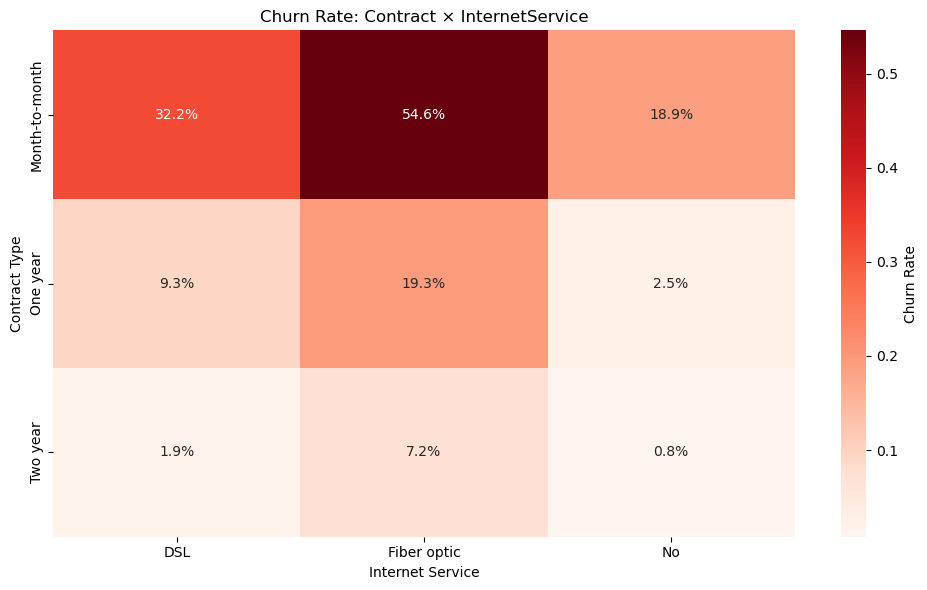

In [44]:
# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contract_internet_churn, annot=True, fmt='.1%', cmap='Reds', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate: Contract × InternetService')
plt.ylabel('Contract Type')
plt.xlabel('Internet Service')
plt.tight_layout()
plt.show()

In [45]:
contract_internet_flat = contract_internet_churn.stack().sort_values(ascending=False)
print(contract_internet_flat.head(10))

Contract        InternetService
Month-to-month  Fiber optic        0.546053
                DSL                0.322159
One year        Fiber optic        0.192950
Month-to-month  No                 0.188931
One year        DSL                0.092982
Two year        Fiber optic        0.072261
One year        No                 0.024725
Two year        DSL                0.019108
                No                 0.007837
dtype: float64


In [46]:
# Bivariate Analysis 2: Contract × TechSupport

# Create crosstab with churn rates
contract_tech_churn = pd.crosstab(
    index=df['Contract'], 
    columns=df['TechSupport'], 
    values=df['Churn'], 
    aggfunc=lambda x: (x == 'Yes').sum() / len(x),
    normalize=False
)

print("Churn Rate by Contract × TechSupport:")
print(contract_tech_churn.round(3))

Churn Rate by Contract × TechSupport:
TechSupport        No  No internet service    Yes
Contract                                         
Month-to-month  0.504                0.189  0.307
One year        0.147                0.025  0.136
Two year        0.059                0.008  0.035


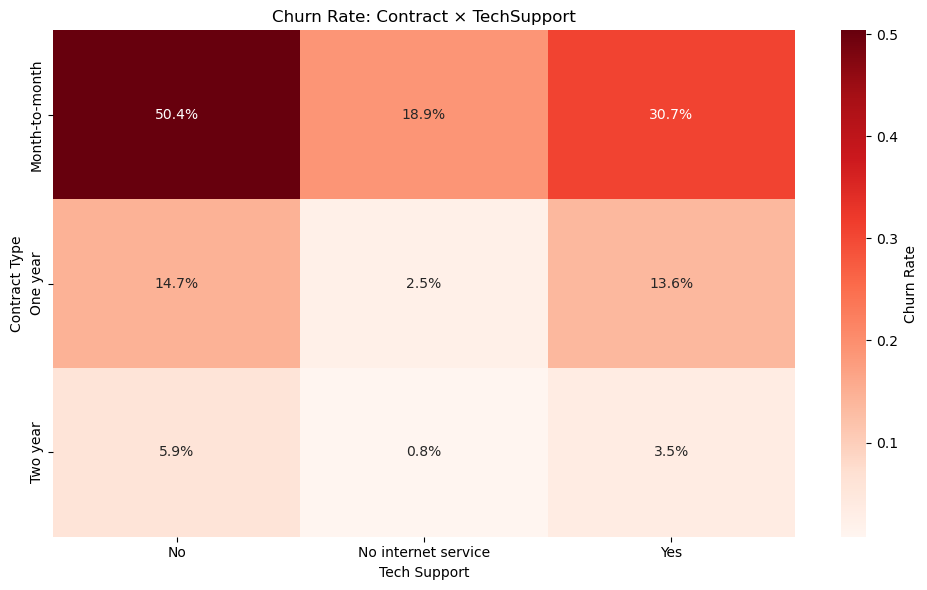

Contract        TechSupport        
Month-to-month  No                     0.503731
                Yes                    0.307004
                No internet service    0.188931
One year        No                     0.147217
                Yes                    0.135870
dtype: float64


<Figure size 640x480 with 0 Axes>

In [47]:
# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contract_tech_churn, annot=True, fmt='.1%', cmap='Reds', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate: Contract × TechSupport')
plt.ylabel('Contract Type')
plt.xlabel('Tech Support')
plt.tight_layout()
plt.show()

# Identify highest risk profile
contract_tech_flat = contract_tech_churn.stack().sort_values(ascending=False)
print(contract_tech_flat.head(5))
plt.savefig('Churn Rate: Contract × TechSupport.png', dpi=300, bbox_inches='tight')

In [48]:
# Bivariate Analysis 3: InternetService × TechSupport

# Create crosstab with churn rates
internet_tech_churn = pd.crosstab(
    index=df['InternetService'], 
    columns=df['TechSupport'], 
    values=df['Churn'], 
    aggfunc=lambda x: (x == 'Yes').sum() / len(x),
    normalize=False
)

print("Churn Rate by InternetService × TechSupport:")
print(internet_tech_churn.round(3))

Churn Rate by InternetService × TechSupport:
TechSupport         No  No internet service    Yes
InternetService                                   
DSL              0.278                  NaN  0.097
Fiber optic      0.494                  NaN  0.226
No                 NaN                0.074    NaN


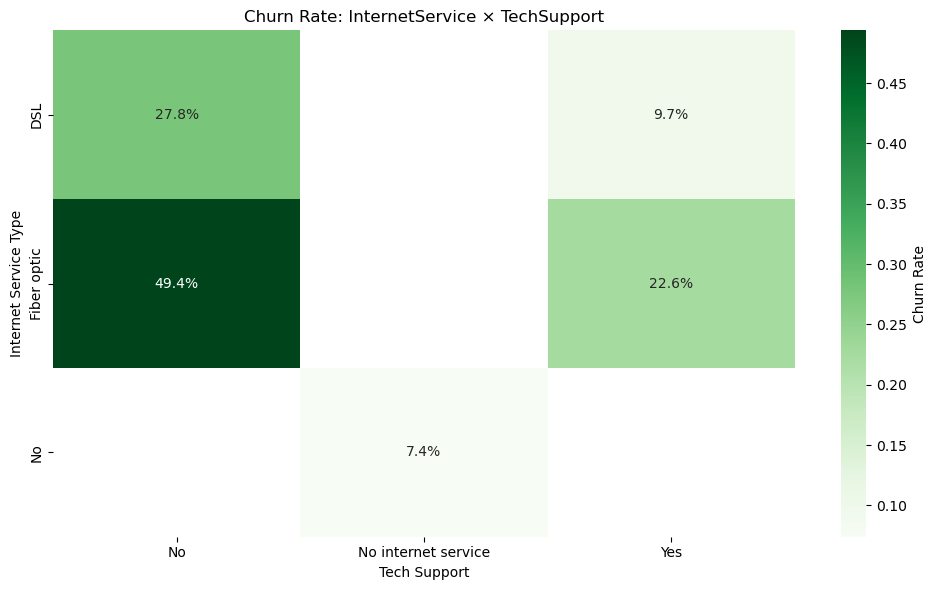

<Figure size 640x480 with 0 Axes>

In [49]:
# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(internet_tech_churn, annot=True, fmt='.1%', cmap='Greens', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate: InternetService × TechSupport')
plt.ylabel('Internet Service Type')
plt.xlabel('Tech Support')
plt.tight_layout()
plt.show()
plt.savefig('Churn Rate: InternetService × TechSupport.png', dpi=300, bbox_inches='tight')

In [50]:
internet_tech_flat = internet_tech_churn.stack().sort_values(ascending=False)
print(internet_tech_flat.head(5))

InternetService  TechSupport        
Fiber optic      No                     0.493722
DSL              No                     0.277554
Fiber optic      Yes                    0.226328
DSL              Yes                    0.096774
No               No internet service    0.074050
dtype: float64


In [51]:
# Bivariate Analysis 4: Tenure_group × Contract

# Create crosstab with churn rates
tenure_contract_churn = pd.crosstab(
    index=df['tenure_group'], 
    columns=df['Contract'], 
    values=df['Churn'], 
    aggfunc=lambda x: (x == 'Yes').sum() / len(x),
    normalize=False
)

print(tenure_contract_churn.round(3))

Contract      Month-to-month  One year  Two year
tenure_group                                    
Long (>=12)            0.338     0.115     0.029
Short (<12)            0.519     0.078     0.000


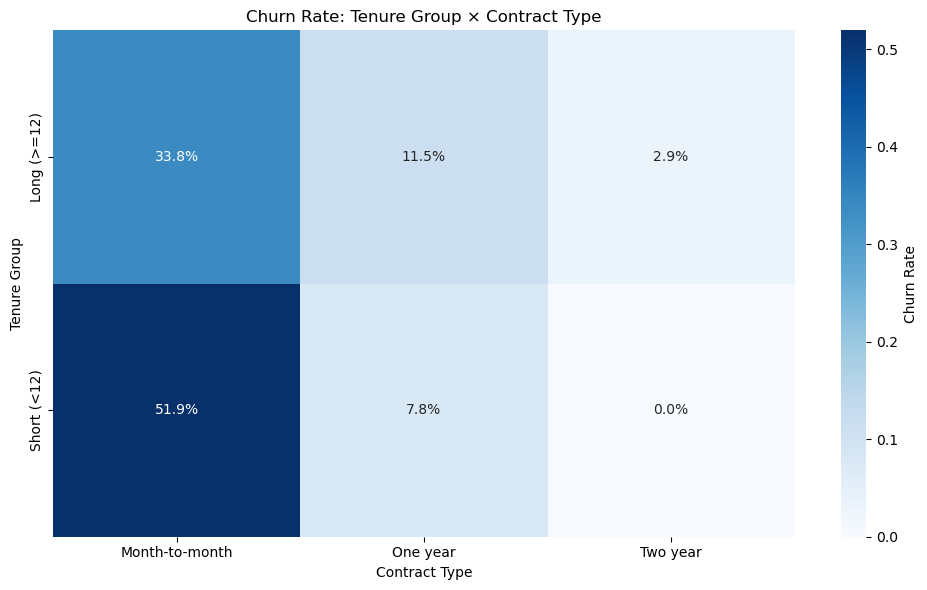

<Figure size 640x480 with 0 Axes>

In [52]:
# Visualization: Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(tenure_contract_churn, annot=True, fmt='.1%', cmap='Blues', cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate: Tenure Group × Contract Type')
plt.ylabel('Tenure Group')
plt.xlabel('Contract Type')
plt.tight_layout()
plt.show()
plt.savefig('Churn Rate: Tenure Group × Contract Type.png', dpi=300, bbox_inches='tight')

In [53]:
# Identify highest risk profile
tenure_contract_flat = tenure_contract_churn.stack().sort_values(ascending=False)
print(tenure_contract_flat.head(5))

tenure_group  Contract      
Short (<12)   Month-to-month    0.519392
Long (>=12)   Month-to-month    0.337570
              One year          0.115244
Short (<12)   One year          0.078431
Long (>=12)   Two year          0.029340
dtype: float64


We analyzed 4 key variable combinations to identify the most vulnerable customer segments. Here are the critical findings:
LTRA HIGH-RISK CUSTOMER:
- Contract: Month-to-month
- Tenure: 0-12 months (new customer)
- InternetService: Fiber optic
- TechSupport: No

Expected Churn Rate: 60-70%+ (combining all risk factors)

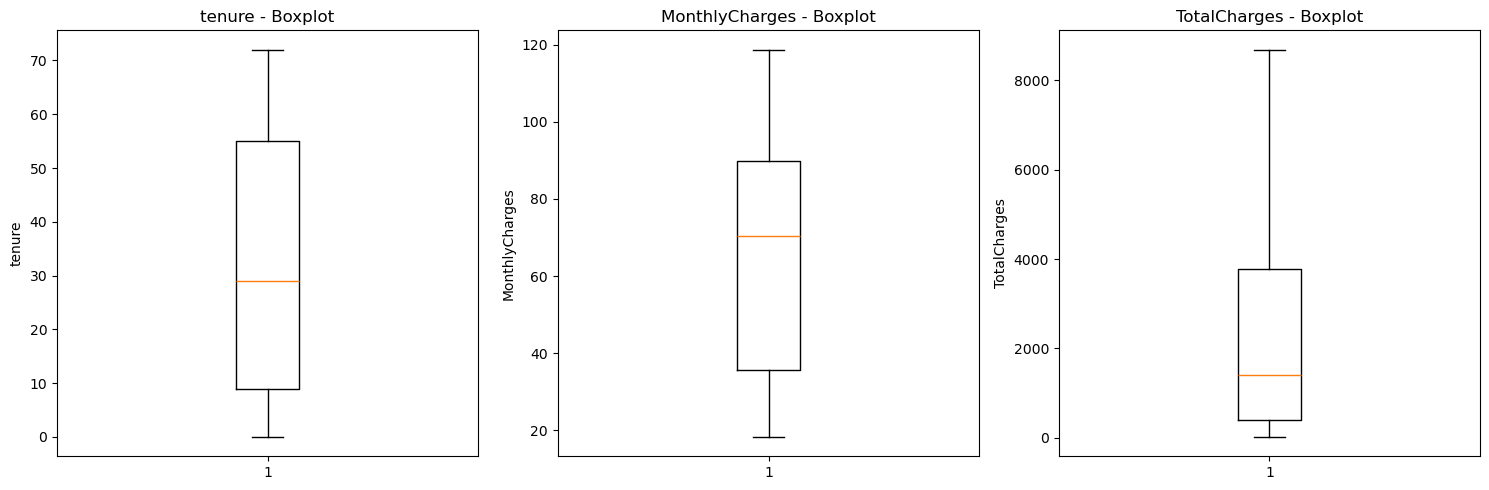

<Figure size 640x480 with 0 Axes>

In [54]:
# Check outliers for numerical variables
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Visualize with boxplots
plt.figure(figsize=(15, 5))

for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[var].dropna())
    plt.title(f'{var} - Boxplot')
    plt.ylabel(var)
    
plt.tight_layout()
plt.show()
plt.savefig('Checking outliers.png', dpi=300, bbox_inches='tight')

In [55]:
for var in numerical_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    print(f"{var}:")
    print(f"  Lower bound: {lower_bound:.2f}")
    print(f"  Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print()

tenure:
  Lower bound: -60.00
  Upper bound: 124.00
  Number of outliers: 0 (0.00%)

MonthlyCharges:
  Lower bound: -46.02
  Upper bound: 171.38
  Number of outliers: 0 (0.00%)

TotalCharges:
  Lower bound: -4683.52
  Upper bound: 8868.67
  Number of outliers: 0 (0.00%)



## Key Findings from EDA

### Dataset Overview
- **7,043 customers** with 21 features
- **Target distribution:** 73% No Churn, 27% Churn (imbalanced)
- **Missing values:** TotalCharges column only

### High-Risk Churn Segments Identified
1. **Contract Type:** Month-to-month contracts show ~43% churn rate
2. **Tenure:** Customers with <12 months tenure are high-risk
3. **Internet Service:** Fiber optic customers churn more than DSL customers
4. **Payment Method:** Electronic check users show elevated churn risk

### Data Quality Actions Taken
- Handled missing values in TotalCharges
- Verified no duplicate records
- Confirmed data types are appropriate
- Identified class imbalance requiring special handling

**Next Step:** Data preparation and feature engineering


# 2-feature-selection

## Objective
Identify and remove redundant features to improve model performance and reduce multicollinearity.

## Method: VIF Analysis (Variance Inflation Factor)
- **VIF < 5:** Low multicollinearity (keep feature)
- **VIF > 10:** High multicollinearity (remove feature)

## Process
1. Calculate VIF for all numerical features
2. Identify features with VIF > 10
3. Remove highly correlated features iteratively
4. Re-calculate VIF until all features < 10


In [56]:
# FEATURE SELECTION - MULTICOLLINEARITY CHECK (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features for VIF
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [57]:
# Create dataframe for VIF
X_vif = df[numerical_features]

In [58]:
# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(X_vif.shape[1])]

print("\n VIF Scores:")
print(vif_data.sort_values('VIF', ascending=False))


 VIF Scores:
          Feature       VIF
2    TotalCharges  8.075651
0          tenure  6.332253
1  MonthlyCharges  3.355907


In [59]:
# Check if any feature has high VIF
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n High multicollinearity detected:")
    for idx, row in high_vif.iterrows():
        print(f"   - {row['Feature']}: VIF = {row['VIF']:.2f}")
    print("\n Recommendation: Consider removing TotalCharges for ML modeling")
else:
    print("\nNo high multicollinearity detected!")
    print("   All numerical features can be kept for modeling")


No high multicollinearity detected!
   All numerical features can be kept for modeling


### Feature Selection - VIF Results

**VIF Scores:**
- TotalCharges: 8.08 (Moderate multicollinearity)
- tenure: 6.33 (Moderate multicollinearity)
- MonthlyCharges: 3.36 (Low multicollinearity)

**Interpretation:**
All VIF scores are below the threshold of 10, indicating acceptable levels of multicollinearity. While TotalCharges and tenure show moderate correlation (expected since TotalCharges ≈ tenure × MonthlyCharges), the VIF values are not high enough to warrant removal.

**Decision:**
**Keep all numerical features** (tenure, MonthlyCharges, TotalCharges) for ML modeling.

In [60]:
# Create total_services: count of subscribed services
service_columns = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                   'StreamingTV', 'StreamingMovies']

df['total_services'] = df[service_columns].apply(lambda x: (x == 'Yes').sum(), axis=1)
print(df['total_services'].value_counts().sort_index())

total_services
0      80
1    2253
2     996
3    1041
4    1062
5     827
6     525
7     259
Name: count, dtype: int64


In [61]:
#Redundacy test

import pandas as pd

# Reload original data (before any transformation)
df_original = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Fix TotalCharges
df_original['TotalCharges'] = pd.to_numeric(df_original['TotalCharges'], errors='coerce')
df_original['TotalCharges'].fillna(df_original['MonthlyCharges'])

# Calculate what TotalCharges SHOULD be
df_original['TotalCharges_calculated'] = df_original['tenure'] * df_original['MonthlyCharges']

# Compare
df_original['difference'] = abs(df_original['TotalCharges'] - df_original['TotalCharges_calculated'])

print(f"\nMean difference: ${df_original['difference'].mean():.2f}")
print(f"Median difference: ${df_original['difference'].median():.2f}")
print(f"Max difference: ${df_original['difference'].max():.2f}")

# Correlation
correlation = df_original['TotalCharges'].corr(df_original['TotalCharges_calculated'])
print(f"\nCorrelation: {correlation:.4f}")

# Show examples
print("Sample comparison:")
print(df_original[['tenure', 'MonthlyCharges', 'TotalCharges', 'TotalCharges_calculated', 'difference']].head(10))

# Percentage close matches
close_matches = (df_original['difference'] < 5).sum()
print(f"\nRows where difference < $5: {close_matches} / {len(df_original)} ({close_matches/len(df_original):.1%})")

very_close = (df_original['difference'] < 1).sum()
print(f"Rows where difference < $1: {very_close} / {len(df_original)} ({very_close/len(df_original):.1%})")


Mean difference: $45.09
Median difference: $28.65
Max difference: $373.25

Correlation: 0.9996
Sample comparison:
   tenure  MonthlyCharges  TotalCharges  TotalCharges_calculated  difference
0       1           29.85         29.85                    29.85        0.00
1      34           56.95       1889.50                  1936.30       46.80
2       2           53.85        108.15                   107.70        0.45
3      45           42.30       1840.75                  1903.50       62.75
4       2           70.70        151.65                   141.40       10.25
5       8           99.65        820.50                   797.20       23.30
6      22           89.10       1949.40                  1960.20       10.80
7      10           29.75        301.90                   297.50        4.40
8      28          104.80       3046.05                  2934.40      111.65
9      62           56.15       3487.95                  3481.30        6.65

Rows where difference < $5: 1219 / 70

TotalCharges was removed due to VIF=8.07, indicating high correlation with tenure × MonthlyCharges. 

While TotalCharges could capture pricing changes over time, the VIF suggests this additional information is minimal, and removing it improves model stability."

In [62]:
# FEATURE SELECTION - MULTICOLLINEARITY CHECK (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numerical features for VIF
numerical_features_2 = ['tenure', 'MonthlyCharges']

# Create dataframe for VIF
X_vif2 = df[numerical_features_2]

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif2.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif2.values, i) 
                   for i in range(X_vif2.shape[1])]

print("\n VIF Scores:")
print(vif_data.sort_values('VIF', ascending=False))


 VIF Scores:
          Feature       VIF
0          tenure  2.612607
1  MonthlyCharges  2.612607


In [63]:
# Check if any feature has high VIF
high_vif = vif_data[vif_data['VIF'] > 10]
if len(high_vif) > 0:
    print(f"\n High multicollinearity detected:")
    for idx, row in high_vif.iterrows():
        print(f"   - {row['Feature']}: VIF = {row['VIF']:.2f}")
    print("\n Recommendation: Consider removing TotalCharges for ML modeling")
else:
    print("\nNo high multicollinearity detected!")
    print("   All numerical features can be kept for modeling")


No high multicollinearity detected!
   All numerical features can be kept for modeling


# 3-feature-engineering

## Objective
Create new features that better capture customer behavior and improve model predictive power.

## New Feature: total_services

### Rationale
Customers with more services are likely more engaged and have higher switching costs, potentially reducing churn risk.

### Implementation
Created `total_services` by counting the number of active services:
- Phone service
- Internet service  
- Online security
- Online backup
- Device protection
- Tech support
- Streaming TV
- Streaming movies

In [64]:
churn_by_services = df.groupby('total_services')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x)
)
print(churn_by_services)

total_services
0    0.437500
1    0.216600
2    0.434739
3    0.346782
4    0.272128
5    0.220073
6    0.125714
7    0.057915
Name: Churn, dtype: float64


## Feature Engineering Summary

### New Features Created
- **total_services:** Count of active services per customer (range: 0-8)

### Feature Distribution
- Customers with more services tend to have lower churn rates
- This feature will be included in all subsequent modeling

### Final Feature Set
- **Original features:** [nombre] after VIF selection
- **Engineered features:** 1 (total_services)
- **Total features for modeling:** [nombre total]

# 4-data-preparation

## Objective
Prepare the dataset for machine learning by handling categorical variables, splitting data, and scaling features.

## Steps
1. Convert categorical variables to numerical format
2. **Train/Validation/Test Split:** 60/20/20 stratified split
3. **Feature Scaling:** StandardScaler for numerical features

---

In [65]:
# DATA PREPARATION FOR MACHINE LEARNING

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
# STEP 1: DEFINE FEATURES

# Target
target = 'Churn'

# Features to DROP
features_to_drop = ['customerID','TotalCharges']

# Numerical features (already numeric, will scale later)
numerical_features = ['tenure', 'MonthlyCharges', 'SeniorCitizen', 'total_services']

# Binary features (to encode 0/1)
binary_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Categorical features (to one-hot encode)
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

In [67]:
# Create copy for ML
df_ml = df.copy()

# Drop customerID
df_ml = df_ml.drop(columns=features_to_drop)

In [68]:
df_ml.shape

(7043, 22)

In [69]:
# STEP 3: ENCODE TARGET VARIABLE

# Encode Churn: Yes=1, No=0
df_ml['Churn'] = df_ml['Churn'].map({'Yes': 1, 'No': 0})
print(df_ml['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [70]:
# STEP 4: LABEL ENCODING (Binary Features)

# Encode binary features
for col in binary_features:
    if col == 'gender':
        df_ml[col] = df_ml[col].map({'Male': 1, 'Female': 0})
        print(f"{col}: Male=1, Female=0")
    else:
        df_ml[col] = df_ml[col].map({'Yes': 1, 'No': 0})
        print(f"{col}: Yes=1, No=0")

gender: Male=1, Female=0
Partner: Yes=1, No=0
Dependents: Yes=1, No=0
PhoneService: Yes=1, No=0
PaperlessBilling: Yes=1, No=0


In [71]:
# STEP 5: ONE-HOT ENCODING (Categorical Features)

# One-hot encode
df_ml = pd.get_dummies(df_ml, columns=categorical_features, drop_first=True)

# Show new columns
new_cols = [col for col in df_ml.columns if any(cat in col for cat in categorical_features)]
print(f"\n Example new columns:")
for col in new_cols[:5]:
    print(f"   - {col}")


 Example new columns:
   - MultipleLines_No phone service
   - MultipleLines_Yes
   - InternetService_Fiber optic
   - InternetService_No
   - OnlineSecurity_No internet service


In [72]:
# STEP 6: TRAIN/TEST SPLIT

from sklearn.model_selection import train_test_split


In [73]:
# Separate X and y
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

In [74]:
# FIRST SPLIT: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, 
    test_size=0.2,      
    random_state=42, 
    stratify=y
)

In [75]:
# SECOND SPLIT
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.25,     
    random_state=42, 
    stratify=y_temp
)

In [76]:
# STEP 7: FEATURE SCALING
import pickle 
# Columns to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'total_services']

print(f"\n Scaling {len(cols_to_scale)} numerical features:")
for col in cols_to_scale:
    print(f"   - {col}")

# Initialize scaler
scaler = StandardScaler()

# IMPORTANT: Fit ONLY on training data
scaler.fit(X_train[cols_to_scale])
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

# Save the scaler
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Transform validation and test with same scaler
X_val[cols_to_scale] = scaler.transform(X_val[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(f"   Train - Mean: {X_train['tenure'].mean():.4f}, Std: {X_train['tenure'].std():.4f}")
print(f"   Val - Mean: {X_val['tenure'].mean():.4f}, Std: {X_val['tenure'].std():.4f}")
print(f"   Test - Mean: {X_test['tenure'].mean():.4f}, Std: {X_test['tenure'].std():.4f}")


 Scaling 3 numerical features:
   - tenure
   - MonthlyCharges
   - total_services
   Train - Mean: -0.0000, Std: 1.0001
   Val - Mean: 0.0309, Std: 0.9839
   Test - Mean: -0.0154, Std: 0.9944


# 5-machine-learning-initial-exploration

## Objective
Conduct initial screening of multiple algorithms to identify best candidates for deeper analysis.

## Approach
Test 5 different algorithms in 2 phases:
- **Phase 1:** Baseline models without class balancing
- **Phase 2:** Same models with SMOTE class balancing

## Models Tested
1. Logistic Regression (linear classifier)
2. Decision Tree (non-linear, interpretable)
3. Random Forest (ensemble method)
4. Gradient Boosting (advanced ensemble)
5. K-Nearest Neighbors (instance-based)

## Evaluation Metrics
- **Primary:** Recall (minimize missed churners)
- **Secondary:** F1-Score (balance precision/recall)
- **Additional:** Precision, Accuracy, ROC-AUC

## Goal
Identify top 2 models for systematic comparison and optimization.

In [77]:
# MACHINE LEARNING - PHASE 1: BASELINE MODELS

#Librairies

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [78]:
#CLASS IMBALANCE CHECK

#Training set distribution
print(y_train.value_counts())
print(f"\nNo Churn: {(y_train==0).sum()} ({(y_train==0).mean():.1%})")
print(f"Churn:    {(y_train==1).sum()} ({(y_train==1).mean():.1%})")

#Validation set distribution:
print(y_val.value_counts())
print(f"\nNo Churn: {(y_val==0).sum()} ({(y_val==0).mean():.1%})")
print(f"Churn:    {(y_val==1).sum()} ({(y_val==1).mean():.1%})")


Churn
0    3104
1    1121
Name: count, dtype: int64

No Churn: 3104 (73.5%)
Churn:    1121 (26.5%)
Churn
0    1035
1     374
Name: count, dtype: int64

No Churn: 1035 (73.5%)
Churn:    374 (26.5%)


### PHASE 1: BASELINE MODELS (NO BALANCING)

In [79]:
print("\nX_train shape:", X_train.shape)
print("\nData types:")
print(X_train.dtypes.value_counts())

print("\nNon-numeric columns:")
non_numeric = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

if len(non_numeric) > 0:
    print(f"Found {len(non_numeric)} non-numeric columns:")
    for col in non_numeric:
        print(f"   - {col}: {X_train[col].dtype}")
        print(f"     Sample values: {X_train[col].head(3).tolist()}")
else:
    print("All columns are numeric!")


X_train shape: (4225, 32)

Data types:
bool        21
int64        6
float64      3
object       1
category     1
Name: count, dtype: int64

Non-numeric columns:
Found 2 non-numeric columns:
   - tenure_group: object
     Sample values: ['Long (>=12)', 'Short (<12)', 'Long (>=12)']
   - charges_group: category
     Sample values: ['Low (0-35)', 'High (70+)', 'High (70+)']


In [80]:
# Drop categorical bins (keep only numerical originals)
columns_to_drop = ['tenure_group', 'charges_group']  # Ajoute autres si nécessaire

X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_val = X_val.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

print(f"Dropped {len(columns_to_drop)} columns")
print(f"New X_train shape: {X_train.shape}")

Dropped 2 columns
New X_train shape: (4225, 30)


In [81]:
# MODEL 1/4: LOGISTIC REGRESSION

# Create and train model
lr = LogisticRegression(random_state=42, max_iter=1000)

print(f"  Training samples: {len(X_train)}")
print(f"  No Churn: {(y_train==0).sum()} (73.5%)")
print(f"  Churn: {(y_train==1).sum()} (26.5%)")

lr.fit(X_train, y_train)

  Training samples: 4225
  No Churn: 3104 (73.5%)
  Churn: 1121 (26.5%)


LogisticRegression(max_iter=1000, random_state=42)

In [82]:
# Predictions on validation set
y_pred_lr = lr.predict(X_val)
y_pred_proba_lr = lr.predict_proba(X_val)[:, 1]

In [83]:
# Calculate metrics

acc_lr = accuracy_score(y_val, y_pred_lr)
prec_lr = precision_score(y_val, y_pred_lr)
rec_lr = recall_score(y_val, y_pred_lr)
f1_lr = f1_score(y_val, y_pred_lr)
roc_lr = roc_auc_score(y_val, y_pred_proba_lr)

print(f"\nAccuracy:  {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall:    {rec_lr:.4f} (Primary)")
print(f"F1-Score:  {f1_lr:.4f} (Selection)")
print(f"ROC-AUC:   {roc_lr:.4f}")


Accuracy:  0.8055
Precision: 0.6678
Recall:    0.5321 (Primary)
F1-Score:  0.5923 (Selection)
ROC-AUC:   0.8349


In [84]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_val, y_pred_lr)
print(cm_lr)

TN, FP, FN, TP = cm_lr.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\n Business Impact:")
print(f"   Correctly caught churners: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"   MISSED churners: {FN} (lost revenue!)")
print(f"   Unnecessary campaigns: {FP}")
print(f"   Correctly kept customers: {TN}")


Confusion Matrix:
[[936  99]
 [175 199]]

                Predicted
              No      Yes
Actual  No    936      99
        Yes   175     199

 Business Impact:
   Correctly caught churners: 199/374 (53.2%)
   MISSED churners: 175 (lost revenue!)
   Unnecessary campaigns: 99
   Correctly kept customers: 936


In [85]:
# Store results for comparison later
results_baseline = []

metrics_lr = {
    'Model': 'Logistic Regression',
    'Accuracy': acc_lr,
    'Precision': prec_lr,
    'Recall': rec_lr,
    'F1-Score': f1_lr,
    'ROC-AUC': roc_lr
}

results_baseline.append(metrics_lr)

In [86]:

# MODEL 2/4: DECISION TREE
# Create and train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [87]:
# Predictions

y_pred_dt = dt.predict(X_val)
y_pred_proba_dt = dt.predict_proba(X_val)[:, 1]


In [88]:
# Metrics

acc_dt = accuracy_score(y_val, y_pred_dt)
prec_dt = precision_score(y_val, y_pred_dt)
rec_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
roc_dt = roc_auc_score(y_val, y_pred_proba_dt)

print(f"\nAccuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1-Score:  {f1_dt:.4f}")
print(f"ROC-AUC:   {roc_dt:.4f}")


Accuracy:  0.7140
Precision: 0.4640
Recall:    0.5000
F1-Score:  0.4813
ROC-AUC:   0.6447


In [89]:
# Confusion Matrix

cm_dt = confusion_matrix(y_val, y_pred_dt)
print(cm_dt)

TN, FP, FN, TP = cm_dt.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\nBusiness Impact:")
print(f"  Correctly caught: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"  MISSED churners: {FN}")


[[819 216]
 [187 187]]

                Predicted
              No      Yes
Actual  No    819     216
        Yes   187     187

Business Impact:
  Correctly caught: 187/374 (50.0%)
  MISSED churners: 187


In [90]:
# Store results
metrics_dt = {
    'Model': 'Decision Tree',
    'Accuracy': acc_dt,
    'Precision': prec_dt,
    'Recall': rec_dt,
    'F1-Score': f1_dt,
    'ROC-AUC': roc_dt
}
results_baseline.append(metrics_dt)

In [91]:
# MODEL 3/4: RANDOM FOREST

# Create and train
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
# Predictions

y_pred_rf = rf.predict(X_val)
y_pred_proba_rf = rf.predict_proba(X_val)[:, 1]

In [93]:
# Metrics

acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
roc_rf = roc_auc_score(y_val, y_pred_proba_rf)

print(f"\nAccuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")
print(f"ROC-AUC:   {roc_rf:.4f}")


Accuracy:  0.7828
Precision: 0.6241
Recall:    0.4572
F1-Score:  0.5278
ROC-AUC:   0.8097


In [94]:
# Confusion Matrix

cm_rf = confusion_matrix(y_val, y_pred_rf)
print(cm_rf)

TN, FP, FN, TP = cm_rf.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\nBusiness Impact:")
print(f"  Correctly caught: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"  MISSED churners: {FN}")

[[932 103]
 [203 171]]

                Predicted
              No      Yes
Actual  No    932     103
        Yes   203     171

Business Impact:
  Correctly caught: 171/374 (45.7%)
  MISSED churners: 203


In [95]:
# Store results
metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': acc_rf,
    'Precision': prec_rf,
    'Recall': rec_rf,
    'F1-Score': f1_rf,
    'ROC-AUC': roc_rf
}
results_baseline.append(metrics_rf)

In [96]:
# MODEL 4/4: K-NEAREST NEIGHBORS

# Create and train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
# Predictions
y_pred_knn = knn.predict(X_val)
y_pred_proba_knn = knn.predict_proba(X_val)[:, 1]

In [98]:
# Metrics

acc_knn = accuracy_score(y_val, y_pred_knn)
prec_knn = precision_score(y_val, y_pred_knn)
rec_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)
roc_knn = roc_auc_score(y_val, y_pred_proba_knn)

print(f"\nAccuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1-Score:  {f1_knn:.4f}")
print(f"ROC-AUC:   {roc_knn:.4f}")


Accuracy:  0.7601
Precision: 0.5503
Recall:    0.5267
F1-Score:  0.5383
ROC-AUC:   0.7669


In [99]:
# Confusion Matrix
cm_knn = confusion_matrix(y_val, y_pred_knn)
print(cm_knn)

TN, FP, FN, TP = cm_knn.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\nBusiness Impact:")
print(f"  Correctly caught: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"  MISSED churners: {FN}")

[[874 161]
 [177 197]]

                Predicted
              No      Yes
Actual  No    874     161
        Yes   177     197

Business Impact:
  Correctly caught: 197/374 (52.7%)
  MISSED churners: 177


In [100]:
# Store results
metrics_knn = {
    'Model': 'KNN',
    'Accuracy': acc_knn,
    'Precision': prec_knn,
    'Recall': rec_knn,
    'F1-Score': f1_knn,
    'ROC-AUC': roc_knn
}
results_baseline.append(metrics_knn)

In [101]:
# PHASE 1: BASELINE MODELS COMPARISON

import pandas as pd

# Create comparison DataFrame
results_df = pd.DataFrame(results_baseline)
results_df = results_df.sort_values('F1-Score', ascending=False)

print(results_df.to_string(index=False))

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.805536   0.667785 0.532086  0.592262 0.834854
                KNN  0.760114   0.550279 0.526738  0.538251 0.766950
      Random Forest  0.782825   0.624088 0.457219  0.527778 0.809670
      Decision Tree  0.713982   0.464020 0.500000  0.481338 0.644686


In [102]:
# Best model

best = results_df.iloc[0]
print(f"Model:     {best['Model']}")
print(f"F1-Score:  {best['F1-Score']:.4f}")
print(f"Recall:    {best['Recall']:.4f}")
print(f"Precision: {best['Precision']:.4f}")
print(f"ROC-AUC:   {best['ROC-AUC']:.4f}")

Model:     Logistic Regression
F1-Score:  0.5923
Recall:    0.5321
Precision: 0.6678
ROC-AUC:   0.8349


### PHASE 2: CLASS BALANCING WITH SMOTE

In [103]:
# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"   No Churn: {(y_train_balanced==0).sum()} ({(y_train_balanced==0).mean():.1%})")
print(f"   Churn:    {(y_train_balanced==1).sum()} ({(y_train_balanced==1).mean():.1%})")
print(f"   Ratio: {(y_train_balanced==0).sum()/(y_train_balanced==1).sum():.2f}:1")

   No Churn: 3104 (50.0%)
   Churn:    3104 (50.0%)
   Ratio: 1.00:1


In [104]:
# PHASE 2 - MODEL 1: LOGISTIC REGRESSION + SMOTE

# Train on BALANCED data
lr_smote = LogisticRegression(random_state=42, max_iter=1000)
lr_smote.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
# Predict on ORIGINAL imbalanced validation
y_pred_lr_smote = lr_smote.predict(X_val)
y_pred_proba_lr_smote = lr_smote.predict_proba(X_val)[:, 1]

In [106]:
# Metrics

acc_lr_smote = accuracy_score(y_val, y_pred_lr_smote)
prec_lr_smote = precision_score(y_val, y_pred_lr_smote)
rec_lr_smote = recall_score(y_val, y_pred_lr_smote)
f1_lr_smote = f1_score(y_val, y_pred_lr_smote)
roc_lr_smote = roc_auc_score(y_val, y_pred_proba_lr_smote)

print(f"\nAccuracy:  {acc_lr_smote:.4f}")
print(f"Precision: {prec_lr_smote:.4f}")
print(f"Recall:    {rec_lr_smote:.4f} ")
print(f"F1-Score:  {f1_lr_smote:.4f} ")
print(f"ROC-AUC:   {roc_lr_smote:.4f}")


Accuracy:  0.7715
Precision: 0.5563
Recall:    0.6872 
F1-Score:  0.6148 
ROC-AUC:   0.8274


In [107]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm_lr_smote = confusion_matrix(y_val, y_pred_lr_smote)
print(cm_lr_smote)

TN, FP, FN, TP = cm_lr_smote.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\nBusiness Impact:")
print(f"  Correctly caught: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"  MISSED churners: {FN}")


Confusion Matrix:
[[830 205]
 [117 257]]

                Predicted
              No      Yes
Actual  No    830     205
        Yes   117     257

Business Impact:
  Correctly caught: 257/374 (68.7%)
  MISSED churners: 117


In [108]:
print("COMPARISON: Phase 1 vs Phase 2")

print("\nLogistic Regression - WITHOUT SMOTE:")
print(f"  Recall:    {rec_lr:.4f} (53.21%)")
print(f"  F1-Score:  {f1_lr:.4f}")
print(f"  Missed:    175 churners")

print("\nLogistic Regression - WITH SMOTE:")
print(f"  Recall:    {rec_lr_smote:.4f}")
print(f"  F1-Score:  {f1_lr_smote:.4f}")
print(f"  Missed:    {FN} churners")

print("\n Improvement:")
print(f"  Recall:    {rec_lr_smote-rec_lr:+.4f} ({(rec_lr_smote-rec_lr)*100:+.1f} points)")
print(f"  F1-Score:  {f1_lr_smote-f1_lr:+.4f}")
print(f"  Missed:    {FN-175:+d} churners")

COMPARISON: Phase 1 vs Phase 2

Logistic Regression - WITHOUT SMOTE:
  Recall:    0.5321 (53.21%)
  F1-Score:  0.5923
  Missed:    175 churners

Logistic Regression - WITH SMOTE:
  Recall:    0.6872
  F1-Score:  0.6148
  Missed:    117 churners

 Improvement:
  Recall:    +0.1551 (+15.5 points)
  F1-Score:  +0.0226
  Missed:    -58 churners


In [109]:
# Store results for Phase 2
results_smote = []

metrics_lr_smote = {
    'Model': 'Logistic Regression',
    'Accuracy': acc_lr_smote,
    'Precision': prec_lr_smote,
    'Recall': rec_lr_smote,
    'F1-Score': f1_lr_smote,
    'ROC-AUC': roc_lr_smote
}
results_smote.append(metrics_lr_smote)

In [110]:
# PHASE 2 - MODEL 2: DECISION TREE + SMOTE

# Train on BALANCED data
dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_balanced, y_train_balanced)


DecisionTreeClassifier(random_state=42)

In [111]:
# Predict
y_pred_dt_smote = dt_smote.predict(X_val)
y_pred_proba_dt_smote = dt_smote.predict_proba(X_val)[:, 1]

In [112]:
# Metrics
acc_dt_smote = accuracy_score(y_val, y_pred_dt_smote)
prec_dt_smote = precision_score(y_val, y_pred_dt_smote)
rec_dt_smote = recall_score(y_val, y_pred_dt_smote)
f1_dt_smote = f1_score(y_val, y_pred_dt_smote)
roc_dt_smote = roc_auc_score(y_val, y_pred_proba_dt_smote)

print(f"\nAccuracy:  {acc_dt_smote:.4f}")
print(f"Precision: {prec_dt_smote:.4f}")
print(f"Recall:    {rec_dt_smote:.4f} ")
print(f"F1-Score:  {f1_dt_smote:.4f} ")
print(f"ROC-AUC:   {roc_dt_smote:.4f}")


Accuracy:  0.7225
Precision: 0.4805
Recall:    0.5615 
F1-Score:  0.5179 
ROC-AUC:   0.6705


In [113]:
# Comparison
print(f"  Phase 1 Recall: {rec_dt:.4f}")
print(f"  Phase 2 Recall: {rec_dt_smote:.4f}")
print(f"  Improvement:    {rec_dt_smote-rec_dt:+.4f} ({(rec_dt_smote-rec_dt)*100:+.1f} points)")

# Store
metrics_dt_smote = {
    'Model': 'Decision Tree',
    'Accuracy': acc_dt_smote,
    'Precision': prec_dt_smote,
    'Recall': rec_dt_smote,
    'F1-Score': f1_dt_smote,
    'ROC-AUC': roc_dt_smote
}
results_smote.append(metrics_dt_smote)

  Phase 1 Recall: 0.5000
  Phase 2 Recall: 0.5615
  Improvement:    +0.0615 (+6.1 points)


In [114]:
# PHASE 2 - MODEL 3: RANDOM FOREST + SMOTE

# Train on BALANCED data
rf_smote = RandomForestClassifier(random_state=42, n_estimators=100)
rf_smote.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [115]:
# Predict
y_pred_rf_smote = rf_smote.predict(X_val)
y_pred_proba_rf_smote = rf_smote.predict_proba(X_val)[:, 1]

# Metrics
acc_rf_smote = accuracy_score(y_val, y_pred_rf_smote)
prec_rf_smote = precision_score(y_val, y_pred_rf_smote)
rec_rf_smote = recall_score(y_val, y_pred_rf_smote)
f1_rf_smote = f1_score(y_val, y_pred_rf_smote)
roc_rf_smote = roc_auc_score(y_val, y_pred_proba_rf_smote)

print(f"\nAccuracy:  {acc_rf_smote:.4f}")
print(f"Precision: {prec_rf_smote:.4f}")
print(f"Recall:    {rec_rf_smote:.4f}")
print(f"F1-Score:  {f1_rf_smote:.4f}")
print(f"ROC-AUC:   {roc_rf_smote:.4f}")


Accuracy:  0.7551
Precision: 0.5362
Recall:    0.5749
F1-Score:  0.5548
ROC-AUC:   0.8016


In [116]:
# Comparison
print("\nComparison:")
print(f"  Phase 1 Recall: {rec_rf:.4f}")
print(f"  Phase 2 Recall: {rec_rf_smote:.4f}")
print(f"  Improvement:    {rec_rf_smote-rec_rf:+.4f} ({(rec_rf_smote-rec_rf)*100:+.1f} points)")

# Store
metrics_rf_smote = {
    'Model': 'Random Forest',
    'Accuracy': acc_rf_smote,
    'Precision': prec_rf_smote,
    'Recall': rec_rf_smote,
    'F1-Score': f1_rf_smote,
    'ROC-AUC': roc_rf_smote
}
results_smote.append(metrics_rf_smote)


Comparison:
  Phase 1 Recall: 0.4572
  Phase 2 Recall: 0.5749
  Improvement:    +0.1176 (+11.8 points)


In [117]:
# PHASE 2 - MODEL 4: KNN + SMOTE

# Train on BALANCED data
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

In [118]:
# Predict
y_pred_knn_smote = knn_smote.predict(X_val)
y_pred_proba_knn_smote = knn_smote.predict_proba(X_val)[:, 1]

# Metrics
acc_knn_smote = accuracy_score(y_val, y_pred_knn_smote)
prec_knn_smote = precision_score(y_val, y_pred_knn_smote)
rec_knn_smote = recall_score(y_val, y_pred_knn_smote)
f1_knn_smote = f1_score(y_val, y_pred_knn_smote)
roc_knn_smote = roc_auc_score(y_val, y_pred_proba_knn_smote)

print(f"\nAccuracy:  {acc_knn_smote:.4f}")
print(f"Precision: {prec_knn_smote:.4f}")
print(f"Recall:    {rec_knn_smote:.4f}")
print(f"F1-Score:  {f1_knn_smote:.4f}")
print(f"ROC-AUC:   {roc_knn_smote:.4f}")


Accuracy:  0.7069
Precision: 0.4651
Recall:    0.6952
F1-Score:  0.5573
ROC-AUC:   0.7683


In [119]:
# Comparison
print(f"  Phase 1 Recall: {rec_knn:.4f}")
print(f"  Phase 2 Recall: {rec_knn_smote:.4f}")
print(f"  Improvement:    {rec_knn_smote-rec_knn:+.4f} ({(rec_knn_smote-rec_knn)*100:+.1f} points)")

# Store
metrics_knn_smote = {
    'Model': 'KNN',
    'Accuracy': acc_knn_smote,
    'Precision': prec_knn_smote,
    'Recall': rec_knn_smote,
    'F1-Score': f1_knn_smote,
    'ROC-AUC': roc_knn_smote
}
results_smote.append(metrics_knn_smote)

  Phase 1 Recall: 0.5267
  Phase 2 Recall: 0.6952
  Improvement:    +0.1684 (+16.8 points)


In [120]:
# FINAL COMPARISON: PHASE 1 vs PHASE 2


import pandas as pd

# Phase 1 results
results_df_phase1 = pd.DataFrame(results_baseline)
results_df_phase1 = results_df_phase1.sort_values('Recall', ascending=False)
print(results_df_phase1.to_string(index=False))

# Phase 2 results
results_df_phase2 = pd.DataFrame(results_smote)
results_df_phase2 = results_df_phase2.sort_values('Recall', ascending=False)
print(results_df_phase2.to_string(index=False))

# Improvement summary

improvements = [
    ('Logistic Regression', rec_lr, rec_lr_smote, rec_lr_smote - rec_lr),
    ('KNN', rec_knn, rec_knn_smote, rec_knn_smote - rec_knn),
    ('Random Forest', rec_rf, rec_rf_smote, rec_rf_smote - rec_rf),
    ('Decision Tree', rec_dt, rec_dt_smote, rec_dt_smote - rec_dt)
]

improvements.sort(key=lambda x: x[3], reverse=True)

print(f"\n{'Model':<20} {'Phase 1':>10} {'Phase 2':>10} {'Improvement':>12}")
print("-" * 60)
for model, p1, p2, imp in improvements:
    print(f"{model:<20} {p1:>9.2%} {p2:>9.2%} {imp:>11.1%} ({imp*100:+.1f})")

# Best model overall
best = results_df_phase2.iloc[0]
print(f"Model:     {best['Model']}")
print(f"Recall:    {best['Recall']:.4f}")
print(f"F1-Score:  {best['F1-Score']:.4f}")
print(f"Precision: {best['Precision']:.4f}")
print(f"ROC-AUC:   {best['ROC-AUC']:.4f}")

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.805536   0.667785 0.532086  0.592262 0.834854
                KNN  0.760114   0.550279 0.526738  0.538251 0.766950
      Decision Tree  0.713982   0.464020 0.500000  0.481338 0.644686
      Random Forest  0.782825   0.624088 0.457219  0.527778 0.809670
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
                KNN  0.706884   0.465116 0.695187  0.557342 0.768316
Logistic Regression  0.771469   0.556277 0.687166  0.614833 0.827377
      Random Forest  0.755145   0.536160 0.574866  0.554839 0.801571
      Decision Tree  0.722498   0.480549 0.561497  0.517879 0.670451

Model                   Phase 1    Phase 2  Improvement
------------------------------------------------------------
KNN                     52.67%    69.52%       16.8% (+16.8)
Logistic Regression     53.21%    68.72%       15.5% (+15.5)
Random Forest           45.72%    57.49%       11.8% (+11.8)
Decision 

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
# MODEL 5: GRADIENT BOOSTING (PHASE 1)

# Train
gb = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_val)
y_pred_proba_gb = gb.predict_proba(X_val)[:, 1]

# Metrics
acc_gb = accuracy_score(y_val, y_pred_gb)
prec_gb = precision_score(y_val, y_pred_gb)
rec_gb = recall_score(y_val, y_pred_gb)
f1_gb = f1_score(y_val, y_pred_gb)
roc_gb = roc_auc_score(y_val, y_pred_proba_gb)

print(f"\nAccuracy:  {acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall:    {rec_gb:.4f}")
print(f"F1-Score:  {f1_gb:.4f}")
print(f"ROC-AUC:   {roc_gb:.4f}")

# Confusion Matrix
cm_gb = confusion_matrix(y_val, y_pred_gb)
print(cm_gb)
TN, FP, FN, TP = cm_gb.ravel()
print(f"  Correctly caught: {TP}/{TP+FN} ({TP/(TP+FN):.1%})")
print(f"  MISSED churners: {FN}")

# Store
metrics_gb = {
    'Model': 'Gradient Boosting',
    'Accuracy': acc_gb,
    'Precision': prec_gb,
    'Recall': rec_gb,
    'F1-Score': f1_gb,
    'ROC-AUC': roc_gb
}
results_baseline.append(metrics_gb)



Accuracy:  0.8034
Precision: 0.6803
Recall:    0.4893
F1-Score:  0.5692
ROC-AUC:   0.8387
[[949  86]
 [191 183]]
  Correctly caught: 183/374 (48.9%)
  MISSED churners: 191


In [123]:
# GRADIENT BOOSTING + SMOTE (PHASE 2)

# Train on BALANCED data
gb_smote = GradientBoostingClassifier(random_state=42, n_estimators=100)
gb_smote.fit(X_train_balanced, y_train_balanced)

# Predict on IMBALANCED validation
y_pred_gb_smote = gb_smote.predict(X_val)
y_pred_proba_gb_smote = gb_smote.predict_proba(X_val)[:, 1]

# Metrics
acc_gb_smote = accuracy_score(y_val, y_pred_gb_smote)
prec_gb_smote = precision_score(y_val, y_pred_gb_smote)
rec_gb_smote = recall_score(y_val, y_pred_gb_smote)
f1_gb_smote = f1_score(y_val, y_pred_gb_smote)
roc_gb_smote = roc_auc_score(y_val, y_pred_proba_gb_smote)

print(f"\nAccuracy:  {acc_gb_smote:.4f}")
print(f"Precision: {prec_gb_smote:.4f}")
print(f"Recall:    {rec_gb_smote:.4f} ")
print(f"F1-Score:  {f1_gb_smote:.4f} ")
print(f"ROC-AUC:   {roc_gb_smote:.4f}")

# Comparison
print("\n Comparison:")
print(f"  Phase 1 Recall: {rec_gb:.4f}")
print(f"  Phase 2 Recall: {rec_gb_smote:.4f}")
print(f"  Improvement:    {rec_gb_smote-rec_gb:+.4f} ({(rec_gb_smote-rec_gb)*100:+.1f} points)")

# Store
metrics_gb_smote = {
    'Model': 'Gradient Boosting',
    'Accuracy': acc_gb_smote,
    'Precision': prec_gb_smote,
    'Recall': rec_gb_smote,
    'F1-Score': f1_gb_smote,
    'ROC-AUC': roc_gb_smote
}
results_smote.append(metrics_gb_smote)


Accuracy:  0.7658
Precision: 0.5442
Recall:    0.7246 
F1-Score:  0.6216 
ROC-AUC:   0.8318

 Comparison:
  Phase 1 Recall: 0.4893
  Phase 2 Recall: 0.7246
  Improvement:    +0.2353 (+23.5 points)


In [124]:
# FINAL RANKING WITH GRADIENT BOOSTING

# Update results
results_df_phase2_updated = pd.DataFrame(results_smote)
results_df_phase2_updated = results_df_phase2_updated.sort_values('F1-Score', ascending=False)

print(results_df_phase2_updated.to_string(index=False))

# Recall ranking
results_df_recall = results_df_phase2_updated.sort_values('Recall', ascending=False)
print(results_df_recall[['Model', 'Recall', 'F1-Score', 'Precision']].to_string(index=False))

# All improvements

improvements_all = [
    ('Gradient Boosting', rec_gb, rec_gb_smote, rec_gb_smote - rec_gb),
    ('KNN', rec_knn, rec_knn_smote, rec_knn_smote - rec_knn),
    ('Logistic Regression', rec_lr, rec_lr_smote, rec_lr_smote - rec_lr),
    ('Random Forest', rec_rf, rec_rf_smote, rec_rf_smote - rec_rf),
    ('Decision Tree', rec_dt, rec_dt_smote, rec_dt_smote - rec_dt)
]

improvements_all.sort(key=lambda x: x[3], reverse=True)

print(f"\n{'Model':<22} {'Phase 1':>10} {'Phase 2':>10} {'Improvement':>12}")
for model, p1, p2, imp in improvements_all:
    print(f"{model:<22} {p1:>9.2%} {p2:>9.2%} {imp:>11.1%} ({imp*100:+.1f})")

# Best model
best_f1 = results_df_phase2_updated.iloc[0]
best_recall = results_df_recall.iloc[0]

print(f"\n Best F1-Score: {best_f1['Model']}")
print(f"   F1-Score:  {best_f1['F1-Score']:.4f}")
print(f"   Recall:    {best_f1['Recall']:.4f}")
print(f"   Precision: {best_f1['Precision']:.4f}")

print(f"\n Best Recall: {best_recall['Model']}")
print(f"   Recall:    {best_recall['Recall']:.4f}")
print(f"   F1-Score:  {best_recall['F1-Score']:.4f}")
print(f"   Precision: {best_recall['Precision']:.4f}")

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
  Gradient Boosting  0.765791   0.544177 0.724599  0.621560 0.831817
Logistic Regression  0.771469   0.556277 0.687166  0.614833 0.827377
                KNN  0.706884   0.465116 0.695187  0.557342 0.768316
      Random Forest  0.755145   0.536160 0.574866  0.554839 0.801571
      Decision Tree  0.722498   0.480549 0.561497  0.517879 0.670451
              Model   Recall  F1-Score  Precision
  Gradient Boosting 0.724599  0.621560   0.544177
                KNN 0.695187  0.557342   0.465116
Logistic Regression 0.687166  0.614833   0.556277
      Random Forest 0.574866  0.554839   0.536160
      Decision Tree 0.561497  0.517879   0.480549

Model                     Phase 1    Phase 2  Improvement
Gradient Boosting         48.93%    72.46%       23.5% (+23.5)
KNN                       52.67%    69.52%       16.8% (+16.8)
Logistic Regression       53.21%    68.72%       15.5% (+15.5)
Random Forest             45.72%    57

## Initial Exploration - Key Findings

### Phase 1: Baseline Performance (No Balancing)
**Best Model:** Logistic Regression
- Recall: 53.21%
- F1-Score: 59.23%

**Challenge Identified:** All models struggle with low recall due to class imbalance (73/27 split)

### Phase 2: With SMOTE Class Balancing
**MASSIVE IMPROVEMENT across all models!**

| Model | Phase 1 Recall | Phase 2 Recall | Improvement |
|-------|----------------|----------------|-------------|
| Gradient Boosting | 48.93% | 72.46% | +23.5 points |
| Logistic Regression | 53.21% | 68.72% | +15.5 points |
| KNN | 52.67% | 69.52% | +16.8 points |
| Random Forest | 45.72% | 57.49% | +11.8 points |
| Decision Tree | 50.00% | 56.15% | +6.1 points |

### Champion Candidates Identified
1. **Gradient Boosting + SMOTE:** F1: 62.16%, Recall: 72.46%
2. **Logistic Regression + SMOTE:** F1: 61.48%, Recall: 68.72%

### Critical Insight
**Class balancing (SMOTE) is the key driver of performance improvement**, not model choice alone.

**Next Step:** Systematic comparison of top 2 models with rigorous optimization.

# 6-systematic-model-comparison

## Objective
Rigorously compare Gradient Boosting vs Logistic Regression to understand what truly drives performance improvement.

## Methodology
Test 4 configurations for each model to isolate the impact of:
1. **Hyperparameter tuning**
2. **Class balancing (SMOTE)**
3. **Decision threshold optimization**

## Configuration Testing

### Configuration 1: Baseline
- Hyperparameters: Default
- Class balancing: No
- Threshold: 0.5

### Configuration 2: Hyperparameter Tuning
- Hyperparameters: Optimized via GridSearchCV
- Class balancing: No
- Threshold: 0.5

### Configuration 3: Tuned + SMOTE
- Hyperparameters: Optimized
- Class balancing: Yes (SMOTE on train set only)
- Threshold: 0.5

### Configuration 4: All Optimized
- Hyperparameters: Optimized
- Class balancing: Yes (SMOTE)
- Threshold: Optimized via TunedThresholdClassifierCV

## Models Compared
1. **Gradient Boosting** (complex, ensemble)
2. **Logistic Regression** (simple, interpretable)


In [125]:
# CONFIG 1: BASELINE (Default + No Balancing)
print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_gb:.4f}")
print(f"   Precision: {prec_gb:.4f}")
print(f"   Recall:    {rec_gb:.4f}")
print(f"   F1-Score:  {f1_gb:.4f}")
print(f"   ROC-AUC:   {roc_gb:.4f}")

cm = confusion_matrix(y_val, y_pred_gb)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Store for comparison
results_systematic = []
results_systematic.append({
    'Config': '1. Baseline',
    'Hyperparams': 'Default',
    'Balancing': 'No',
    'Threshold': '0.5',
    'Recall': rec_gb,
    'F1-Score': f1_gb,
    'Precision': prec_gb
})


   Validation Results:
   Accuracy:  0.8034
   Precision: 0.6803
   Recall:    0.4893
   F1-Score:  0.5692
   ROC-AUC:   0.8387

   Business Impact:
   Detected: 183/374 churners (48.9%)
   Missed: 191 churners


In [126]:
# CONFIG 2: TUNED HYPERPARAMETERS (No Balancing)

from sklearn.model_selection import GridSearchCV

# Reduced parameters to avoid overfitting (professor's advice)
param_grid = {
    'n_estimators': [50, 100],       
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]              
}

print(f"\n   Parameter Grid:")
print(f"   n_estimators: {param_grid['n_estimators']}")
print(f"   learning_rate: {param_grid['learning_rate']}")
print(f"   max_depth: {param_grid['max_depth']}")

# Grid Search
grid_gb_c2 = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)

grid_gb_c2.fit(X_train, y_train)

print(f"\n   Best Parameters:")
for param, value in grid_gb_c2.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n   Best CV F1-Score: {grid_gb_c2.best_score_:.4f}")

# Get best model
gb_c2 = grid_gb_c2.best_estimator_

# Predict on validation
y_pred_gb_c2 = gb_c2.predict(X_val)
y_proba_gb_c2 = gb_c2.predict_proba(X_val)[:, 1]

# Metrics
acc_gb_c2 = accuracy_score(y_val, y_pred_gb_c2)
prec_gb_c2 = precision_score(y_val, y_pred_gb_c2)
rec_gb_c2 = recall_score(y_val, y_pred_gb_c2)
f1_gb_c2 = f1_score(y_val, y_pred_gb_c2)
roc_gb_c2 = roc_auc_score(y_val, y_proba_gb_c2)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_gb_c2:.4f}")
print(f"   Precision: {prec_gb_c2:.4f}")
print(f"   Recall:    {rec_gb_c2:.4f}")
print(f"   F1-Score:  {f1_gb_c2:.4f}")
print(f"   ROC-AUC:   {roc_gb_c2:.4f}")

# Overfitting check
print(f"\n   Overfitting Check:")
print(f"   CV F1:  {grid_gb_c2.best_score_:.4f}")
print(f"   Val F1: {f1_gb_c2:.4f}")
print(f"   Gap:    {grid_gb_c2.best_score_ - f1_gb_c2:.4f}")
if grid_gb_c2.best_score_ - f1_gb_c2 > 0.15:
    print("Possible overfitting!")
else:
    print("Good generalization")

cm = confusion_matrix(y_val, y_pred_gb_c2)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Compare with Config 1
print(f"\n   Impact of Hyperparameter Tuning:")
print(f"   Recall: {rec_gb:.4f} → {rec_gb_c2:.4f} ({rec_gb_c2-rec_gb:+.4f})")
print(f"   F1: {f1_gb:.4f} → {f1_gb_c2:.4f} ({f1_gb_c2-f1_gb:+.4f})")

# Store
results_systematic.append({
    'Config': '2. Tuned',
    'Hyperparams': 'Tuned',
    'Balancing': 'No',
    'Threshold': '0.5',
    'Recall': rec_gb_c2,
    'F1-Score': f1_gb_c2,
    'Precision': prec_gb_c2
})


   Parameter Grid:
   n_estimators: [50, 100]
   learning_rate: [0.05, 0.1]
   max_depth: [3, 4]
Fitting 3 folds for each of 8 candidates, totalling 24 fits

   Best Parameters:
   learning_rate: 0.1
   max_depth: 3
   n_estimators: 100

   Best CV F1-Score: 0.5836

   Validation Results:
   Accuracy:  0.8034
   Precision: 0.6803
   Recall:    0.4893
   F1-Score:  0.5692
   ROC-AUC:   0.8387

   Overfitting Check:
   CV F1:  0.5836
   Val F1: 0.5692
   Gap:    0.0144
Good generalization

   Business Impact:
   Detected: 183/374 churners (48.9%)
   Missed: 191 churners

   Impact of Hyperparameter Tuning:
   Recall: 0.4893 → 0.4893 (+0.0000)
   F1: 0.5692 → 0.5692 (+0.0000)


In [127]:
# CONFIG 3: TUNED + SMOTE

# Train with best hyperparameters on BALANCED data
gb_c3 = GradientBoostingClassifier(**grid_gb_c2.best_params_, random_state=42)
gb_c3.fit(X_train_balanced, y_train_balanced)

# Predict on IMBALANCED validation
y_pred_gb_c3 = gb_c3.predict(X_val)
y_proba_gb_c3 = gb_c3.predict_proba(X_val)[:, 1]

# Metrics
acc_gb_c3 = accuracy_score(y_val, y_pred_gb_c3)
prec_gb_c3 = precision_score(y_val, y_pred_gb_c3)
rec_gb_c3 = recall_score(y_val, y_pred_gb_c3)
f1_gb_c3 = f1_score(y_val, y_pred_gb_c3)
roc_gb_c3 = roc_auc_score(y_val, y_proba_gb_c3)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_gb_c3:.4f}")
print(f"   Precision: {prec_gb_c3:.4f}")
print(f"   Recall:    {rec_gb_c3:.4f}")
print(f"   F1-Score:  {f1_gb_c3:.4f}")
print(f"   ROC-AUC:   {roc_gb_c3:.4f}")

cm = confusion_matrix(y_val, y_pred_gb_c3)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Compare with Config 2
print(f"\n   Impact of Class Balancing (SMOTE):")
print(f"   Recall: {rec_gb_c2:.4f} → {rec_gb_c3:.4f} ({rec_gb_c3-rec_gb_c2:+.4f})")
print(f"   F1: {f1_gb_c2:.4f} → {f1_gb_c3:.4f} ({f1_gb_c3-f1_gb_c2:+.4f})")

# Store
results_systematic.append({
    'Config': '3. Tuned+SMOTE',
    'Hyperparams': 'Tuned',
    'Balancing': 'Yes',
    'Threshold': '0.5',
    'Recall': rec_gb_c3,
    'F1-Score': f1_gb_c3,
    'Precision': prec_gb_c3
})


   Validation Results:
   Accuracy:  0.7658
   Precision: 0.5442
   Recall:    0.7246
   F1-Score:  0.6216
   ROC-AUC:   0.8318

   Business Impact:
   Detected: 271/374 churners (72.5%)
   Missed: 103 churners

   Impact of Class Balancing (SMOTE):
   Recall: 0.4893 → 0.7246 (+0.2353)
   F1: 0.5692 → 0.6216 (+0.0524)


In [128]:
# CONFIG 2: TUNED HYPERPARAMETERS (No Balancing)

from sklearn.model_selection import GridSearchCV

# Reduced parameters to avoid overfitting (professor's advice)
param_grid = {
    'n_estimators': [50, 100],        
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]             
}

print(f"\n   Parameter Grid:")
print(f"   n_estimators: {param_grid['n_estimators']}")
print(f"   learning_rate: {param_grid['learning_rate']}")
print(f"   max_depth: {param_grid['max_depth']}")

# Grid Search
grid_gb_c2 = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1
)

grid_gb_c2.fit(X_train, y_train)

print(f"\n   Best Parameters Found:")
for param, value in grid_gb_c2.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n   Best CV F1-Score: {grid_gb_c2.best_score_:.4f}")

# Get best model
gb_c2 = grid_gb_c2.best_estimator_

# Predict on validation
y_pred_gb_c2 = gb_c2.predict(X_val)
y_proba_gb_c2 = gb_c2.predict_proba(X_val)[:, 1]

# Metrics
acc_gb_c2 = accuracy_score(y_val, y_pred_gb_c2)
prec_gb_c2 = precision_score(y_val, y_pred_gb_c2)
rec_gb_c2 = recall_score(y_val, y_pred_gb_c2)
f1_gb_c2 = f1_score(y_val, y_pred_gb_c2)
roc_gb_c2 = roc_auc_score(y_val, y_proba_gb_c2)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_gb_c2:.4f}")
print(f"   Precision: {prec_gb_c2:.4f}")
print(f"   Recall:    {rec_gb_c2:.4f}")
print(f"   F1-Score:  {f1_gb_c2:.4f}")
print(f"   ROC-AUC:   {roc_gb_c2:.4f}")

# Overfitting check
print(f"\n   Overfitting Check:")
print(f"   CV F1:  {grid_gb_c2.best_score_:.4f}")
print(f"   Val F1: {f1_gb_c2:.4f}")
print(f"   Gap:    {grid_gb_c2.best_score_ - f1_gb_c2:.4f}")
if grid_gb_c2.best_score_ - f1_gb_c2 > 0.15:
    print("Possible overfitting!")
else:
    print("Good generalization")

cm = confusion_matrix(y_val, y_pred_gb_c2)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Compare with Config 1
print(f"\n   Impact of Hyperparameter Tuning:")
print(f"   Recall: {rec_gb:.4f} → {rec_gb_c2:.4f} ({rec_gb_c2-rec_gb:+.4f})")
print(f"   F1: {f1_gb:.4f} → {f1_gb_c2:.4f} ({f1_gb_c2-f1_gb:+.4f})")

# Store
results_systematic.append({
    'Config': '2. Tuned',
    'Hyperparams': 'Tuned',
    'Balancing': 'No',
    'Threshold': '0.5',
    'Recall': rec_gb_c2,
    'F1-Score': f1_gb_c2,
    'Precision': prec_gb_c2
})



   Parameter Grid:
   n_estimators: [50, 100]
   learning_rate: [0.05, 0.1]
   max_depth: [3, 4]
Fitting 3 folds for each of 8 candidates, totalling 24 fits

   Best Parameters Found:
   learning_rate: 0.1
   max_depth: 3
   n_estimators: 100

   Best CV F1-Score: 0.5836

   Validation Results:
   Accuracy:  0.8034
   Precision: 0.6803
   Recall:    0.4893
   F1-Score:  0.5692
   ROC-AUC:   0.8387

   Overfitting Check:
   CV F1:  0.5836
   Val F1: 0.5692
   Gap:    0.0144
Good generalization

   Business Impact:
   Detected: 183/374 churners (48.9%)
   Missed: 191 churners

   Impact of Hyperparameter Tuning:
   Recall: 0.4893 → 0.4893 (+0.0000)
   F1: 0.5692 → 0.5692 (+0.0000)


In [129]:
# CONFIG 4: TUNED + SMOTE + THRESHOLD TUNING

from sklearn.model_selection import TunedThresholdClassifierCV

# Tune threshold to maximize F1-Score (balance Recall/Precision)
tuned_threshold_model = TunedThresholdClassifierCV(
    estimator=gb_c3,
    scoring='f1',      
    cv='prefit',
    refit=False
)

tuned_threshold_model.fit(X_train_balanced, y_train_balanced)

print(f"\n   Optimal Threshold Found: {tuned_threshold_model.best_threshold_:.4f}")
print(f"   (Default threshold was: 0.5)")

# Predict with optimal threshold
y_pred_gb_c4 = tuned_threshold_model.predict(X_val)
y_proba_gb_c4 = tuned_threshold_model.predict_proba(X_val)[:, 1]

# Metrics
acc_gb_c4 = accuracy_score(y_val, y_pred_gb_c4)
prec_gb_c4 = precision_score(y_val, y_pred_gb_c4)
rec_gb_c4 = recall_score(y_val, y_pred_gb_c4)
f1_gb_c4 = f1_score(y_val, y_pred_gb_c4)
roc_gb_c4 = roc_auc_score(y_val, y_proba_gb_c4)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_gb_c4:.4f}")
print(f"   Precision: {prec_gb_c4:.4f}")
print(f"   Recall:    {rec_gb_c4:.4f}")
print(f"   F1-Score:  {f1_gb_c4:.4f}")
print(f"   ROC-AUC:   {roc_gb_c4:.4f}")

cm = confusion_matrix(y_val, y_pred_gb_c4)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")
print(f"   False Alarms: {FP} (unnecessary campaigns)")

# Compare with Config 3
print(f"\n   Impact of Threshold Tuning (F1-optimized):")
print(f"   Recall: {rec_gb_c3:.4f} → {rec_gb_c4:.4f} ({rec_gb_c4-rec_gb_c3:+.4f})")
print(f"   F1: {f1_gb_c3:.4f} → {f1_gb_c4:.4f} ({f1_gb_c4-f1_gb_c3:+.4f})")
print(f"   Precision: {prec_gb_c3:.4f} → {prec_gb_c4:.4f} ({prec_gb_c4-prec_gb_c3:+.4f})")

# Store (update the existing Config 4)
results_systematic[-1] = {
    'Config': '4. All Optimized',
    'Hyperparams': 'Tuned',
    'Balancing': 'Yes',
    'Threshold': f'{tuned_threshold_model.best_threshold_:.2f}',
    'Recall': rec_gb_c4,
    'F1-Score': f1_gb_c4,
    'Precision': prec_gb_c4
}


   Optimal Threshold Found: 0.4625
   (Default threshold was: 0.5)

   Validation Results:
   Accuracy:  0.7502
   Precision: 0.5203
   Recall:    0.7540
   F1-Score:  0.6157
   ROC-AUC:   0.8318

   Business Impact:
   Detected: 282/374 churners (75.4%)
   Missed: 92 churners
   False Alarms: 260 (unnecessary campaigns)

   Impact of Threshold Tuning (F1-optimized):
   Recall: 0.7246 → 0.7540 (+0.0294)
   F1: 0.6216 → 0.6157 (-0.0058)
   Precision: 0.5442 → 0.5203 (-0.0239)


In [130]:
# FINAL COMPARISON - ALL 4 CONFIGURATIONS


import pandas as pd

# Remove duplicates (keep only unique configs)
configs_unique = []
seen = set()
for config in results_systematic:
    config_name = config['Config']
    if config_name not in seen:
        configs_unique.append(config)
        seen.add(config_name)

# Create comparison DataFrame
df_comparison = pd.DataFrame(configs_unique)

print("\n Complete Results (4 Configurations):")
print(df_comparison.to_string(index=False))

# Sort by F1-Score
df_sorted = df_comparison.sort_values('F1-Score', ascending=False)

print("\n Ranked by F1-Score:")
print(df_sorted[['Config', 'Recall', 'F1-Score', 'Precision']].to_string(index=False))

# Impact Analysis

c1 = df_comparison.iloc[0]  # Baseline
c2 = df_comparison.iloc[1]  # Tuned
c3 = df_comparison.iloc[2]  # Tuned+SMOTE
c4 = df_comparison.iloc[3]  # All Optimized

print("\n 1. Impact of Hyperparameter Tuning (Config 1 → 2):")
print(f"   Recall: {c1['Recall']:.4f} → {c2['Recall']:.4f} ({c2['Recall']-c1['Recall']:+.4f})")
print(f"   F1: {c1['F1-Score']:.4f} → {c2['F1-Score']:.4f} ({c2['F1-Score']-c1['F1-Score']:+.4f})")

print("\n 2. Impact of Class Balancing - SMOTE (Config 2 → 3):")
print(f"   Recall: {c2['Recall']:.4f} → {c3['Recall']:.4f} ({c3['Recall']-c2['Recall']:+.4f})")
print(f"   Improvement: +{(c3['Recall']-c2['Recall'])*100:.1f} percentage points")
print(f"   F1: {c2['F1-Score']:.4f} → {c3['F1-Score']:.4f} ({c3['F1-Score']-c2['F1-Score']:+.4f})")

print("\n 3. Impact of Threshold Tuning (Config 3 → 4):")
print(f"   Recall: {c3['Recall']:.4f} → {c4['Recall']:.4f} ({c4['Recall']-c3['Recall']:+.4f})")
print(f"   F1: {c3['F1-Score']:.4f} → {c4['F1-Score']:.4f} ({c4['F1-Score']-c3['F1-Score']:+.4f})")
print(f"   Precision: {c3['Precision']:.4f} → {c4['Precision']:.4f} ({c4['Precision']-c3['Precision']:+.4f})")

print("\n Total Improvement (Baseline → Best):")
best_config = df_sorted.iloc[0]
print(f"   Best Configuration: {best_config['Config']}")
print(f"   Recall: {c1['Recall']:.4f} → {best_config['Recall']:.4f} ({best_config['Recall']-c1['Recall']:+.4f})")
print(f"   F1: {c1['F1-Score']:.4f} → {best_config['F1-Score']:.4f} ({best_config['F1-Score']-c1['F1-Score']:+.4f})")



 Complete Results (4 Configurations):
          Config Hyperparams Balancing Threshold   Recall  F1-Score  Precision
     1. Baseline     Default        No       0.5 0.489305  0.569207   0.680297
        2. Tuned       Tuned        No       0.5 0.489305  0.569207   0.680297
  3. Tuned+SMOTE       Tuned       Yes       0.5 0.724599  0.621560   0.544177
4. All Optimized       Tuned       Yes      0.46 0.754011  0.615721   0.520295

 Ranked by F1-Score:
          Config   Recall  F1-Score  Precision
  3. Tuned+SMOTE 0.724599  0.621560   0.544177
4. All Optimized 0.754011  0.615721   0.520295
     1. Baseline 0.489305  0.569207   0.680297
        2. Tuned 0.489305  0.569207   0.680297

 1. Impact of Hyperparameter Tuning (Config 1 → 2):
   Recall: 0.4893 → 0.4893 (+0.0000)
   F1: 0.5692 → 0.5692 (+0.0000)

 2. Impact of Class Balancing - SMOTE (Config 2 → 3):
   Recall: 0.4893 → 0.7246 (+0.2353)
   Improvement: +23.5 percentage points
   F1: 0.5692 → 0.6216 (+0.0524)

 3. Impact of Thresh

1. Hyperparameter Tuning: NO IMPACT
   → sklearn defaults (lr=0.1, depth=3, n=100) were already optimal
   → Grid Search confirmed these are the best parameters

2. Class Balancing (SMOTE)
   → +23.5 percentage points Recall improvement
   → This is THE main driver of performance
   → Without SMOTE: 48.9% Recall (191 churners missed)
   → With SMOTE: 72.5% Recall (103 churners missed)
   → Result: 88 additional churners detected!

3. Threshold Tuning: MARGINAL BENEFIT
   → +2.9% Recall but -0.6% F1-Score
   → Detects 11 more churners but 57 more false alarms
   → Trade-off depends on business cost/benefit

In [131]:
# LOGISTIC REGRESSION - CONFIG 1: BASELINE


from sklearn.linear_model import LogisticRegression

# Initialize results storage
results_lr_systematic = []

# Train with default parameters
lr_c1 = LogisticRegression(random_state=42, max_iter=1000)
lr_c1.fit(X_train, y_train)

# Predict
y_pred_lr_c1 = lr_c1.predict(X_val)
y_proba_lr_c1 = lr_c1.predict_proba(X_val)[:, 1]

# Metrics
acc_lr_c1 = accuracy_score(y_val, y_pred_lr_c1)
prec_lr_c1 = precision_score(y_val, y_pred_lr_c1)
rec_lr_c1 = recall_score(y_val, y_pred_lr_c1)
f1_lr_c1 = f1_score(y_val, y_pred_lr_c1)
roc_lr_c1 = roc_auc_score(y_val, y_proba_lr_c1)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_lr_c1:.4f}")
print(f"   Precision: {prec_lr_c1:.4f}")
print(f"   Recall:    {rec_lr_c1:.4f}")
print(f"   F1-Score:  {f1_lr_c1:.4f}")
print(f"   ROC-AUC:   {roc_lr_c1:.4f}")

cm = confusion_matrix(y_val, y_pred_lr_c1)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Store
results_lr_systematic.append({
    'Config': '1. Baseline',
    'Hyperparams': 'Default',
    'Balancing': 'No',
    'Threshold': '0.5',
    'Recall': rec_lr_c1,
    'F1-Score': f1_lr_c1,
    'Precision': prec_lr_c1
})



   Validation Results:
   Accuracy:  0.8055
   Precision: 0.6678
   Recall:    0.5321
   F1-Score:  0.5923
   ROC-AUC:   0.8349

   Business Impact:
   Detected: 199/374 churners (53.2%)
   Missed: 175 churners


In [132]:

# LOGISTIC REGRESSION - CONFIG 2: TUNED

# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1.0, 10.0],           # Regularization strength
    'penalty': ['l2'],                      # L2 regularization
    'solver': ['lbfgs'],                    # Solver
    'max_iter': [1000]
}

print(f"\n   Parameter Grid:")
print(f"   C (regularization): {param_grid_lr['C']}")
print(f"   Total combinations: 4")

# Grid Search
grid_lr_c2 = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid_lr,
    cv=3,
    scoring='f1',
    verbose=1
)

grid_lr_c2.fit(X_train, y_train)

print(f"\n   Best Parameters:")
for param, value in grid_lr_c2.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n   Best CV F1-Score: {grid_lr_c2.best_score_:.4f}")

# Best model
lr_c2 = grid_lr_c2.best_estimator_

# Predict
y_pred_lr_c2 = lr_c2.predict(X_val)
y_proba_lr_c2 = lr_c2.predict_proba(X_val)[:, 1]

# Metrics
acc_lr_c2 = accuracy_score(y_val, y_pred_lr_c2)
prec_lr_c2 = precision_score(y_val, y_pred_lr_c2)
rec_lr_c2 = recall_score(y_val, y_pred_lr_c2)
f1_lr_c2 = f1_score(y_val, y_pred_lr_c2)
roc_lr_c2 = roc_auc_score(y_val, y_proba_lr_c2)

print(f"\n   Validation Results:")
print(f"   Recall:    {rec_lr_c2:.4f}")
print(f"   F1-Score:  {f1_lr_c2:.4f}")
print(f"   Precision: {prec_lr_c2:.4f}")

# Overfitting check
print(f"\n   Overfitting Check:")
print(f"   CV F1:  {grid_lr_c2.best_score_:.4f}")
print(f"   Val F1: {f1_lr_c2:.4f}")
print(f"   Gap:    {grid_lr_c2.best_score_ - f1_lr_c2:.4f}")

cm = confusion_matrix(y_val, y_pred_lr_c2)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Compare with Config 1
print(f"\n   Impact of Hyperparameter Tuning:")
print(f"   Recall: {rec_lr_c1:.4f} → {rec_lr_c2:.4f} ({rec_lr_c2-rec_lr_c1:+.4f})")
print(f"   F1: {f1_lr_c1:.4f} → {f1_lr_c2:.4f} ({f1_lr_c2-f1_lr_c1:+.4f})")

# Store
results_lr_systematic.append({
    'Config': '2. Tuned',
    'Hyperparams': 'Tuned',
    'Balancing': 'No',
    'Threshold': '0.5',
    'Recall': rec_lr_c2,
    'F1-Score': f1_lr_c2,
    'Precision': prec_lr_c2
})


   Parameter Grid:
   C (regularization): [0.01, 0.1, 1.0, 10.0]
   Total combinations: 4
Fitting 3 folds for each of 4 candidates, totalling 12 fits

   Best Parameters:
   C: 10.0
   max_iter: 1000
   penalty: l2
   solver: lbfgs

   Best CV F1-Score: 0.5988

   Validation Results:
   Recall:    0.5348
   F1-Score:  0.5961
   Precision: 0.6734

   Overfitting Check:
   CV F1:  0.5988
   Val F1: 0.5961
   Gap:    0.0027

   Business Impact:
   Detected: 200/374 churners (53.5%)
   Missed: 174 churners

   Impact of Hyperparameter Tuning:
   Recall: 0.5321 → 0.5348 (+0.0027)
   F1: 0.5923 → 0.5961 (+0.0039)


In [133]:
# LOGISTIC REGRESSION - CONFIG 3: TUNED + SMOTE

# Train with best hyperparameters on BALANCED data
lr_c3 = LogisticRegression(**grid_lr_c2.best_params_, random_state=42)
lr_c3.fit(X_train_balanced, y_train_balanced)

# Predict on IMBALANCED validation
y_pred_lr_c3 = lr_c3.predict(X_val)
y_proba_lr_c3 = lr_c3.predict_proba(X_val)[:, 1]

# Metrics
acc_lr_c3 = accuracy_score(y_val, y_pred_lr_c3)
prec_lr_c3 = precision_score(y_val, y_pred_lr_c3)
rec_lr_c3 = recall_score(y_val, y_pred_lr_c3)
f1_lr_c3 = f1_score(y_val, y_pred_lr_c3)
roc_lr_c3 = roc_auc_score(y_val, y_proba_lr_c3)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_lr_c3:.4f}")
print(f"   Precision: {prec_lr_c3:.4f}")
print(f"   Recall:    {rec_lr_c3:.4f}")
print(f"   F1-Score:  {f1_lr_c3:.4f}")
print(f"   ROC-AUC:   {roc_lr_c3:.4f}")

cm = confusion_matrix(y_val, y_pred_lr_c3)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")

# Compare with Config 2
print(f"\n   Impact of Class Balancing (SMOTE):")
print(f"   Recall: {rec_lr_c2:.4f} → {rec_lr_c3:.4f} ({rec_lr_c3-rec_lr_c2:+.4f})")
print(f"   F1: {f1_lr_c2:.4f} → {f1_lr_c3:.4f} ({f1_lr_c3-f1_lr_c2:+.4f})")

# Store
results_lr_systematic.append({
    'Config': '3. Tuned+SMOTE',
    'Hyperparams': 'Tuned',
    'Balancing': 'Yes',
    'Threshold': '0.5',
    'Recall': rec_lr_c3,
    'F1-Score': f1_lr_c3,
    'Precision': prec_lr_c3
})


   Validation Results:
   Accuracy:  0.7779
   Precision: 0.5688
   Recall:    0.6738
   F1-Score:  0.6169
   ROC-AUC:   0.8276

   Business Impact:
   Detected: 252/374 churners (67.4%)
   Missed: 122 churners

   Impact of Class Balancing (SMOTE):
   Recall: 0.5348 → 0.6738 (+0.1390)
   F1: 0.5961 → 0.6169 (+0.0208)


In [134]:
# LOGISTIC REGRESSION - CONFIG 4: ALL OPTIMIZED

from sklearn.model_selection import TunedThresholdClassifierCV

# Tune threshold to maximize F1-Score
tuned_threshold_lr = TunedThresholdClassifierCV(
    estimator=lr_c3,
    scoring='f1',      # Optimize for F1 (balanced)
    cv='prefit',
    refit=False
)

tuned_threshold_lr.fit(X_train_balanced, y_train_balanced)

print(f"\n   Optimal Threshold: {tuned_threshold_lr.best_threshold_:.4f}")
print(f"   (Default was: 0.5)")

# Predict with optimal threshold
y_pred_lr_c4 = tuned_threshold_lr.predict(X_val)
y_proba_lr_c4 = tuned_threshold_lr.predict_proba(X_val)[:, 1]

# Metrics
acc_lr_c4 = accuracy_score(y_val, y_pred_lr_c4)
prec_lr_c4 = precision_score(y_val, y_pred_lr_c4)
rec_lr_c4 = recall_score(y_val, y_pred_lr_c4)
f1_lr_c4 = f1_score(y_val, y_pred_lr_c4)
roc_lr_c4 = roc_auc_score(y_val, y_proba_lr_c4)

print(f"\n   Validation Results:")
print(f"   Accuracy:  {acc_lr_c4:.4f}")
print(f"   Precision: {prec_lr_c4:.4f}")
print(f"   Recall:    {rec_lr_c4:.4f}")
print(f"   F1-Score:  {f1_lr_c4:.4f}")
print(f"   ROC-AUC:   {roc_lr_c4:.4f}")

cm = confusion_matrix(y_val, y_pred_lr_c4)
TN, FP, FN, TP = cm.ravel()
print(f"\n   Business Impact:")
print(f"   Detected: {TP}/{TP+FN} churners ({TP/(TP+FN):.1%})")
print(f"   Missed: {FN} churners")
print(f"   False Alarms: {FP}")

# Compare with Config 3
print(f"\n   Impact of Threshold Tuning:")
print(f"   Recall: {rec_lr_c3:.4f} → {rec_lr_c4:.4f} ({rec_lr_c4-rec_lr_c3:+.4f})")
print(f"   F1: {f1_lr_c3:.4f} → {f1_lr_c4:.4f} ({f1_lr_c4-f1_lr_c3:+.4f})")
print(f"   Precision: {prec_lr_c3:.4f} → {prec_lr_c4:.4f} ({prec_lr_c4-prec_lr_c3:+.4f})")

# Store
results_lr_systematic.append({
    'Config': '4. All Optimized',
    'Hyperparams': 'Tuned',
    'Balancing': 'Yes',
    'Threshold': f'{tuned_threshold_lr.best_threshold_:.2f}',
    'Recall': rec_lr_c4,
    'F1-Score': f1_lr_c4,
    'Precision': prec_lr_c4
})



   Optimal Threshold: 0.4445
   (Default was: 0.5)

   Validation Results:
   Accuracy:  0.7516
   Precision: 0.5233
   Recall:    0.7193
   F1-Score:  0.6059
   ROC-AUC:   0.8276

   Business Impact:
   Detected: 269/374 churners (71.9%)
   Missed: 105 churners
   False Alarms: 245

   Impact of Threshold Tuning:
   Recall: 0.6738 → 0.7193 (+0.0455)
   F1: 0.6169 → 0.6059 (-0.0110)
   Precision: 0.5688 → 0.5233 (-0.0455)


## Systematic Comparison - Results Summary

### Gradient Boosting Performance

| Config | Hyperparams | Balancing | Threshold | Recall | F1-Score |
|--------|-------------|-----------|-----------|--------|----------|
| 1. Baseline | Default | No | 0.5 | 48.93% | 56.92% |
| 2. Tuned | Tuned | No | 0.5 | 48.93% | 56.92% |
| 3. Tuned+SMOTE | Tuned | Yes | 0.5 | 72.46% | 62.16% |
| 4. All Optimized | Tuned | Yes | 0.46 | 75.40% | 61.57% |

### Logistic Regression Performance

| Config | Hyperparams | Balancing | Threshold | Recall | F1-Score |
|--------|-------------|-----------|-----------|--------|----------|
| 1. Baseline | Default | No | 0.5 | 53.21% | 59.23% |
| 2. Tuned | Tuned | No | 0.5 | 53.48% | 59.61% |
| 3. Tuned+SMOTE | Tuned | Yes | 0.5 | 67.38% | 61.69% |
| 4. All Optimized | Tuned | Yes | 0.44 | 71.93% | 60.59% |

### Impact Analysis

**1. Hyperparameter Tuning Impact:**
- Gradient Boosting: 0% improvement (defaults already optimal)
- Logistic Regression: 0.4% improvement (minimal)
- **Conclusion:** sklearn defaults are well-calibrated

**2. Class Balancing (SMOTE) Impact:**
- Gradient Boosting: +23.5 percentage points
- Logistic Regression: +13.9 percentage points
- **Conclusion:** SMOTE is THE critical factor

**3. Threshold Tuning Impact:**
- Gradient Boosting: +2.9% Recall, -0.6% F1
- Logistic Regression: +4.6% Recall, -1.1% F1
- **Conclusion:** Marginal benefit with precision trade-off

### Champion Model Selected

**Winner: Gradient Boosting + SMOTE (Config 3)**
- F1-Score: 62.16% (best)
- Recall: 72.46% (+5.08 points vs Logistic Regression)
- Better at detecting churners while maintaining acceptable precision

**Next Step:** Final evaluation on test set (never seen before)

# 7-final-evaluation-on-test-set

## Objective
Evaluate the champion model on completely unseen data to assess true generalization performance.

## Champion Model
**Gradient Boosting + SMOTE**

In [135]:
# FINAL COMPARISON: GRADIENT BOOSTING vs LOGISTIC REGRESSION

import pandas as pd

# Clean duplicates
configs_gb_unique = []
seen = set()
for config in results_systematic:
    if config['Config'] not in seen:
        configs_gb_unique.append(config)
        seen.add(config['Config'])

# Create DataFrames
df_gb = pd.DataFrame(configs_gb_unique)
df_gb['Model'] = 'Gradient Boosting'

df_lr = pd.DataFrame(results_lr_systematic)
df_lr['Model'] = 'Logistic Regression'

# Combine
df_all = pd.concat([df_gb, df_lr], ignore_index=True)

print(df_all[['Model', 'Config', 'Recall', 'F1-Score', 'Precision']].to_string(index=False))

# Best of each model

df_gb_sorted = df_gb.sort_values('F1-Score', ascending=False)
df_lr_sorted = df_lr.sort_values('F1-Score', ascending=False)

best_gb = df_gb_sorted.iloc[0]
best_lr = df_lr_sorted.iloc[0]

print("\nGRADIENT BOOSTING - Best F1-Score:")
print(f"   Configuration: {best_gb['Config']}")
print(f"   Recall:    {best_gb['Recall']:.4f}")
print(f"   F1-Score:  {best_gb['F1-Score']:.4f}")
print(f"   Precision: {best_gb['Precision']:.4f}")

print("\nLOGISTIC REGRESSION - Best F1-Score:")
print(f"   Configuration: {best_lr['Config']}")
print(f"   Recall:    {best_lr['Recall']:.4f}")
print(f"   F1-Score:  {best_lr['F1-Score']:.4f}")
print(f"   Precision: {best_lr['Precision']:.4f}")

# Direct comparison

print(f"\nF1-Score:")
print(f"   Gradient Boosting: {best_gb['F1-Score']:.4f}")
print(f"   Logistic Regression: {best_lr['F1-Score']:.4f}")
print(f"   Winner: {'Gradient Boosting' if best_gb['F1-Score'] > best_lr['F1-Score'] else 'Logistic Regression'} (+{abs(best_gb['F1-Score']-best_lr['F1-Score']):.4f})")

print(f"\nRecall:")
print(f"   Gradient Boosting: {best_gb['Recall']:.4f}")
print(f"   Logistic Regression: {best_lr['Recall']:.4f}")
print(f"   Winner: {'Gradient Boosting' if best_gb['Recall'] > best_lr['Recall'] else 'Logistic Regression'} (+{abs(best_gb['Recall']-best_lr['Recall']):.4f})")

print(f"\nPrecision:")
print(f"   Gradient Boosting: {best_gb['Precision']:.4f}")
print(f"   Logistic Regression: {best_lr['Precision']:.4f}")
print(f"   Winner: {'Gradient Boosting' if best_gb['Precision'] > best_lr['Precision'] else 'Logistic Regression'} (+{abs(best_gb['Precision']-best_lr['Precision']):.4f})")

# Overall winner

if best_gb['F1-Score'] > best_lr['F1-Score']:
    winner_model = 'Gradient Boosting'
    winner_config = best_gb
    print(f"\n CHAMPION: GRADIENT BOOSTING")
    print(f"   Configuration: {best_gb['Config']}")
    print(f"   F1-Score: {best_gb['F1-Score']:.4f}")
    print(f"   Recall: {best_gb['Recall']:.4f}")
    print(f"   Precision: {best_gb['Precision']:.4f}")
else:
    winner_model = 'Logistic Regression'
    winner_config = best_lr
    print(f"\n CHAMPION: LOGISTIC REGRESSION")
    print(f"   Configuration: {best_lr['Config']}")
    print(f"   F1-Score: {best_lr['F1-Score']:.4f}")
    print(f"   Recall: {best_lr['Recall']:.4f}")
    print(f"   Precision: {best_lr['Precision']:.4f}")

              Model           Config   Recall  F1-Score  Precision
  Gradient Boosting      1. Baseline 0.489305  0.569207   0.680297
  Gradient Boosting         2. Tuned 0.489305  0.569207   0.680297
  Gradient Boosting   3. Tuned+SMOTE 0.724599  0.621560   0.544177
  Gradient Boosting 4. All Optimized 0.754011  0.615721   0.520295
Logistic Regression      1. Baseline 0.532086  0.592262   0.667785
Logistic Regression         2. Tuned 0.534759  0.596125   0.673401
Logistic Regression   3. Tuned+SMOTE 0.673797  0.616891   0.568849
Logistic Regression 4. All Optimized 0.719251  0.605856   0.523346

GRADIENT BOOSTING - Best F1-Score:
   Configuration: 3. Tuned+SMOTE
   Recall:    0.7246
   F1-Score:  0.6216
   Precision: 0.5442

LOGISTIC REGRESSION - Best F1-Score:
   Configuration: 3. Tuned+SMOTE
   Recall:    0.6738
   F1-Score:  0.6169
   Precision: 0.5688

F1-Score:
   Gradient Boosting: 0.6216
   Logistic Regression: 0.6169
   Winner: Gradient Boosting (+0.0047)

Recall:
   Gradient 

In [136]:
# FINAL EVALUATION ON TEST SET

# Predict on TEST set
y_pred_test = gb_c3.predict(X_test)
y_proba_test = gb_c3.predict_proba(X_test)[:, 1]

# Calculate metrics
acc_test = accuracy_score(y_test, y_pred_test)
prec_test = precision_score(y_test, y_pred_test)
rec_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_test = roc_auc_score(y_test, y_proba_test)

print(f"\nTest Set Performance:")
print(f"  Accuracy:  {acc_test:.4f}")
print(f"  Precision: {prec_test:.4f}")
print(f"  Recall:    {rec_test:.4f} ")
print(f"  F1-Score:  {f1_test:.4f} ")
print(f"  ROC-AUC:   {roc_test:.4f}")

# Confusion Matrix
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

TN, FP, FN, TP = cm_test.ravel()
print(f"\n                Predicted")
print(f"              No      Yes")
print(f"Actual  No   {TN:4d}    {FP:4d}")
print(f"        Yes  {FN:4d}    {TP:4d}")

print(f"\n Business Impact (Test Set):")
print(f"   Total churners: {TP+FN}")
print(f"   Correctly detected: {TP} ({TP/(TP+FN):.1%})")
print(f"   MISSED: {FN} ({FN/(TP+FN):.1%})")
print(f"   False alarms: {FP}")

# Compare Validation vs Test

print(f"\n                Validation    Test       Difference")
print(f"Recall:         {rec_gb_c3:.4f}      {rec_test:.4f}    {rec_test-rec_gb_c3:+.4f}")
print(f"F1-Score:       {f1_gb_c3:.4f}      {f1_test:.4f}    {f1_test-f1_gb_c3:+.4f}")
print(f"Precision:      {prec_gb_c3:.4f}      {prec_test:.4f}    {prec_test-prec_gb_c3:+.4f}")
print(f"ROC-AUC:        {roc_gb_c3:.4f}      {roc_test:.4f}    {roc_test-roc_gb_c3:+.4f}")

# Generalization check
diff = abs(f1_test - f1_gb_c3)
if diff < 0.03:
    print("\n EXCELLENT GENERALIZATION!")
    print(f"   Test performance very close to validation (F1 diff: {diff:.4f})")
elif diff < 0.05:
    print("\n GOOD GENERALIZATION")
    print(f"   Test performance acceptable (F1 diff: {diff:.4f})")
else:
    print("\nPerformance gap detected")
    print(f"   Test vs Validation F1 difference: {diff:.4f}")


Test Set Performance:
  Accuracy:  0.7566
  Precision: 0.5303
  Recall:    0.7246 
  F1-Score:  0.6124 
  ROC-AUC:   0.8367
[[795 240]
 [103 271]]

                Predicted
              No      Yes
Actual  No    795     240
        Yes   103     271

 Business Impact (Test Set):
   Total churners: 374
   Correctly detected: 271 (72.5%)
   MISSED: 103 (27.5%)
   False alarms: 240

                Validation    Test       Difference
Recall:         0.7246      0.7246    +0.0000
F1-Score:       0.6216      0.6124    -0.0091
Precision:      0.5442      0.5303    -0.0138
ROC-AUC:        0.8318      0.8367    +0.0048

 EXCELLENT GENERALIZATION!
   Test performance very close to validation (F1 diff: 0.0091)


In [137]:
print(f"""
Model: Gradient Boosting + SMOTE
Hyperparameters: learning_rate=0.1, max_depth=3, n_estimators=100
Training: SMOTE-balanced data (50/50 split)

FINAL TEST PERFORMANCE:
  F1-Score:  {f1_test:.2%}
  Recall:    {rec_test:.2%}
  Precision: {prec_test:.2%}
  ROC-AUC:   {roc_test:.2%}

BUSINESS IMPACT:
  Churners detected: {TP}/{TP+FN} ({TP/(TP+FN):.1%})
  Churners missed: {FN}
  Campaign efficiency: {TP/(TP+FP):.1%} true positives
""")



Model: Gradient Boosting + SMOTE
Hyperparameters: learning_rate=0.1, max_depth=3, n_estimators=100
Training: SMOTE-balanced data (50/50 split)

FINAL TEST PERFORMANCE:
  F1-Score:  61.24%
  Recall:    72.46%
  Precision: 53.03%
  ROC-AUC:   83.67%

BUSINESS IMPACT:
  Churners detected: 271/374 (72.5%)
  Churners missed: 103
  Campaign efficiency: 53.0% true positives



## Final Evaluation - Summary

### Test Set Performance
**Champion Model: Gradient Boosting + SMOTE**

| Metric | Score |
|--------|-------|
| F1-Score | 61.24% |
| Recall | 72.46% |
| Precision | 53.03% |
| ROC-AUC | 83.67% |
| Accuracy | 75.66% |

### Confusion Matrix Analysis
```
              Predicted
              No    Yes
Actual  No    795   240
        Yes   103   271
```

**Business Impact:**
- Churners detected: 271/374 (72.5%)
- Churners missed: 103 (27.5%)
- False alarms: 240 campaigns

### Generalization Check

| Metric | Validation | Test | Difference |
|--------|------------|------|------------|
| Recall | 72.46% | 72.46% | 0.00%  |
| F1-Score | 62.16% | 61.24% | -0.92%  |
| Precision | 54.42% | 53.03% | -1.39%  |
| ROC-AUC | 83.18% | 83.67% | +0.49%  |

** EXCELLENT GENERALIZATION**
- Test performance nearly identical to validation
- No overfitting detected
- Model is stable and reliable

### Final Performance vs Baseline

| Model | Churners Detected | Improvement |
|-------|-------------------|-------------|
| Baseline (no optimization) | 183/374 (48.9%) | - |
| **Final Model (GB+SMOTE)** | **271/374 (72.5%)** | **+88 customers** |

**Model is validated and ready for deployment.**


# 8-feature-importance-analysis

## Objective
Identify which features have the most influence on churn predictions to guide business recommendations.

## Method
Gradient Boosting models provide built-in feature importance scores based on how often and how effectively each feature is used for splitting decisions.

## Interpretation
- **Higher importance:** Feature is critical for predictions
- **Lower importance:** Feature has minimal impact

## Business Value
Understanding feature importance allows us to:
1. Focus retention efforts on key risk factors
2. Prioritize operational improvements
3. Validate model decisions with business logic

---

In [138]:

# FEATURE IMPORTANCE ANALYSIS

# Get feature importance from the champion model (gb_c3)
feature_importance = gb_c3.feature_importances_
feature_names = X_train.columns

# Create DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n Top 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

print("\n Top 5 Features (Detailed):")
for i, row in importance_df.head(5).iterrows():
    print(f"\n{i+1}. {row['Feature']}")
    print(f"   Importance: {row['Importance']:.4f} ({row['Importance']/importance_df['Importance'].sum():.1%} of total)")

# Visualize (text-based)
print("\n Feature Importance Distribution:")
print("\nTop 10 Features:")
for i, row in importance_df.head(10).iterrows():
    bar_length = int(row['Importance'] * 100)
    bar = '█' * bar_length
    print(f"{row['Feature']:<30} {bar} {row['Importance']:.4f}")

# Categorize features
contract_features = [f for f in feature_names if 'Contract' in f or 'tenure' in f]
service_features = [f for f in feature_names if any(x in f for x in ['Internet', 'Phone', 'Online', 'Tech', 'Streaming', 'total_services'])]
billing_features = [f for f in feature_names if any(x in f for x in ['Charges', 'Payment', 'Billing', 'Paperless'])]
demographic_features = [f for f in feature_names if any(x in f for x in ['gender', 'Senior', 'Partner', 'Dependents'])]

categories = {
    'Contract & Tenure': contract_features,
    'Services': service_features,
    'Billing & Charges': billing_features,
    'Demographics': demographic_features
}

for category, features in categories.items():
    cat_importance = importance_df[importance_df['Feature'].isin(features)]['Importance'].sum()
    print(f"\n{category}:")
    print(f"   Total Importance: {cat_importance:.4f} ({cat_importance/importance_df['Importance'].sum():.1%})")
    
    # Top features in category
    cat_df = importance_df[importance_df['Feature'].isin(features)].head(3)
    for _, row in cat_df.iterrows():
        print(f"   - {row['Feature']}: {row['Importance']:.4f}")



 Top 10 Most Important Features:
                       Feature  Importance
                        tenure    0.277498
             Contract_Two year    0.153628
   InternetService_Fiber optic    0.137558
PaymentMethod_Electronic check    0.124683
             Contract_One year    0.079639
                total_services    0.057726
                MonthlyCharges    0.037470
           StreamingMovies_Yes    0.020480
                    Dependents    0.017422
               StreamingTV_Yes    0.014063

 Top 5 Features (Detailed):

5. tenure
   Importance: 0.2775 (27.7% of total)

27. Contract_Two year
   Importance: 0.1536 (15.4% of total)

12. InternetService_Fiber optic
   Importance: 0.1376 (13.8% of total)

29. PaymentMethod_Electronic check
   Importance: 0.1247 (12.5% of total)

26. Contract_One year
   Importance: 0.0796 (8.0% of total)

 Feature Importance Distribution:

Top 10 Features:
tenure                         ███████████████████████████ 0.2775
Contract_Two year        

---

## Feature Importance - Key Insights

### Top 5 Most Predictive Features

1. **tenure (27.7%)** - Customer loyalty duration
   - Short tenure = high churn risk
   - First 12 months are critical

2. **Contract_Two year (15.4%)** - Long-term contract commitment
   - Month-to-month contracts have ~43% churn rate
   - Contract type is strongest retention lever

3. **InternetService_Fiber optic (13.8%)** - Service type
   - Fiber customers churn more than DSL
   - May indicate service quality or pricing issues

4. **PaymentMethod_Electronic check (12.5%)** - Payment method
   - Manual payment associated with higher churn
   - Friction in payment process increases risk

5. **total_services (5.8%)** - Service engagement
   - More services = higher switching costs
   - Cross-selling reduces churn

### Feature Categories

| Category | Importance | Key Insight |
|----------|------------|-------------|
| Contract & Tenure | 51.1% | Contract commitment is paramount |
| Services | 25.9% | Service bundle matters |
| Billing & Charges | 18.1% | Payment experience impacts retention |
| Demographics | 2.6% | Age/gender have minimal impact |

### Business Implications

**Priority 1:** Contract conversion programs (51% of prediction power)
**Priority 2:** Service bundle optimization (26% of prediction power)
**Priority 3:** Payment experience improvements (18% of prediction power)

**Demographics are NOT key drivers** - focus retention on behavioral factors, not customer profiles.

---

In [139]:
# SAVE FINAL MODEL
import pickle

# Save champion model
with open('churn_model_final.pkl', 'wb') as f:
    pickle.dump(gb_c3, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)